DUOC UC<BR>
Minería de Datos
<BR>
Nombre de profesor: Gabriel Estivales<br>
Integrantes: Pamela<BR>
             

#Metodología CRISP-DM



La metodología CRISP-DM (Cross Industry Standard Process for Data Mining) consta de seis fases: Comprensión del negocio, Comprensión de los datos, Preparación de los datos, Modelado, Evaluación e Implementación. Se utiliza el conjunto de datos meteorológicos de Australia

#1. Comprensión del Negocio


Contexto

El proyecto se trata del estudio de un set de datos con lecturas relacionadas al clima en distintas ciudades de Australia.

Australia, con su vasta extensión y diversidad climática, enfrenta desafíos únicos en la predicción y gestión del clima. El análisis de datos meteorológicos históricos puede proporcionar información valiosa para diversos sectores, incluyendo la agricultura, la gestión de recursos y el transporte. Este proyecto tiene como objetivo principal identificar patrones y tendencias en los datos climáticos para apoyar la toma de decisiones en estos sectores.

**Objetivo del Negocio**:
El objetivo de este proyecto es analizar los datos del clima en Australia para identificar patrones y tendencias con los datos climáticos y extraer información útil para  toma de decisiones en áreas como la agricultura, el transporte y la gestión de recursos naturales.
<br>

**Relevancia del Análisis:** Australia, siendo un continente con condiciones climáticas extremas y diversas, requiere predicciones precisas del clima para mitigar los riesgos del impacto de fenómenos meteorologicos.



**Objetivos Específicos:**


La Oficina de Meteorología de la Commonwealth de Australia, recopilo datos de observaciones del clima en varias ciudades de Australia, como la temperatura minima y maxima, la direccion y velocidad del viento, humedad y presion en distintas horas del dia, ademas de si llovio o no ese dia y cuan soleado estuvo.

El objetivo es tratar de predecir si habra o no lluvia al siguiente dia


* Predecir si lloverá al día siguiente (Lluvia_mañana).
* Predecir la cantidad de lluvia (Lluvia_Registrada_mm).


#2. Comprensión de los Datos



Para empezar se importacion de librerias y configuraciones iniciales necesarias para el desarrollo del proyecto

In [ ]:
from scipy.stats import pearsonr
import pickle as pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [ ]:

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV, cross_val_score


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [ ]:
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  name=fn
name = './weatherAUS.csv'

In [ ]:
df = pd.read_csv(name, sep=",", low_memory=False)


In [ ]:
df1=df

In [ ]:
df2=df

In [ ]:
df3=df

**Descripción del Conjunto de Datos:**

Date: Fecha de la observación<br>
Location: Ubicación de la estación meteorológica<br>
MinTemp: Temperatura mínima en grados Celsius<br>
MaxTemp: Temperatura máxima en grados Celsius<br>
Lluvia: Cantidad de lluvia registrada ese día en mm.<br>
Evaporacion: Evaporación (mm) en 24 horas<br>
Sunshine: Número de horas de sol brillante en el día<br>
DirRafaga: Dirección de la ráfaga de viento más fuerte en 24 horas.<br>
VelRafaga: Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.<br>
Dir9am: Dirección del viento a las 9am<br>
Dir3pm: Dirección del viento a las 3pm<br>
Vel9am: Velocidad (km/hr) del viento a las 9am<br>
Vel3pm: Velocidad (km/hr) del viento a las 3pm<br>
Hum9am: Porcentaje de humedad a las 9am<br>
Hum3pm: Porcentaje de humedad a las 3pm<br>
Pres9am: Presión atmosférica (hpa) a nivel del mar a las 9am<br>
Pres3pm: Presión atmosférica (hpa) a nivel del mar a las 3pm<br>
Nub9am: Fracción del cielo cubierto por nubes a las 9am.<br>
Nub3pm: Fracción del cielo cubierto por nubes a las 3pm.<br>
Temp9am: Temperatura en grados Celsius a las 9am<br>
Temp3pm: Temperatura en grados Celsius a las 3pm<br>
RainToday: Variable indicadora de si llovió hoy (>1 mm)<br>
RISK_MM: Cantidad de lluvia registrada en mm<br>
RainTomorrow: Variable objetivo, indicadora de si lloverá mañana (Sí/No)<br>

###Analisis exploratorio de los datos

Empezamos analizando el set de datos que vamos a trabajar para comprender lo que tenemos.

In [ ]:
df.shape

(142193, 24)

##**Descripción del dataset:**

**Registros**: 142.193

**Variables:** 24

##**Variables:**

**Características numéricas:** 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am''Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM .

**Características categóricas:**'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'

**Variable objetivo**: RainTomorrow (Sí/No).


Partimos extrayendo una muestra aleatoria de todo el set de datos con tamaño de 10 filas

In [ ]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


##**Traduccion de Variables**

Se renombran las columnas para facilitar la comprension de las variables y sus registros.

In [ ]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
renombre_variables = {'Date': 'Fecha', 'Location':'Localidad', 'MinTemp':'Temp_minima', 'MaxTemp': 'Temp_maxima', 'Rainfall':'Lluvia_dia_mm', 'Evaporation':'Evaporacion',
       'Sunshine':'Soleado', 'WindGustDir':'DirRafaga', 'WindGustSpeed':'VelRafaga', 'WindDir9am':'Dir_viento9am', 'WindDir3pm':'Dir_viento3pm',
       'WindSpeed9am':'Vel_viento9am', 'WindSpeed3pm':'Vel_viento3pm', 'Humidity9am':'Humedad_9am', 'Humidity3pm':'Humedad_3pm',
       'Pressure9am':'presion_atm_9am', 'Pressure3pm':'presion_atm_3pm', 'Cloud9am':'Nubes_9am', 'Cloud3pm':'Nubes_3pm', 'Temp9am':'Temp9am',
       'Temp3pm':'Temp3pm', 'RainToday':'Lluvia_Hoy', 'RISK_MM':'Lluvia_Registrada_mm', 'RainTomorrow':'Lluvia_Mañana'

}

Se renombran las columnas

In [ ]:
df.rename(columns=renombre_variables, inplace=True)
# Acá se imprimen las nuevas columnas del DataFrame
print("Nuevos nombres de las columnas:")
print(df.columns)


Nuevos nombres de las columnas:
Index(['Fecha', 'Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'Evaporacion', 'Soleado', 'DirRafaga', 'VelRafaga', 'Dir_viento9am',
       'Dir_viento3pm', 'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am',
       'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am',
       'Nubes_3pm', 'Temp9am', 'Temp3pm', 'Lluvia_Hoy', 'Lluvia_Registrada_mm',
       'Lluvia_Mañana'],
      dtype='object')


In [ ]:
df.shape

(142193, 24)

Con este codigo revisamos el tamaño del set y los tipos de datos que hay en cada columna. El dataset consta de 142.193 filas repartidas en 24 columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Fecha                 142193 non-null  object 
 1   Localidad             142193 non-null  object 
 2   Temp_minima           141556 non-null  float64
 3   Temp_maxima           141871 non-null  float64
 4   Lluvia_dia_mm         140787 non-null  float64
 5   Evaporacion           81350 non-null   float64
 6   Soleado               74377 non-null   float64
 7   DirRafaga             132863 non-null  object 
 8   VelRafaga             132923 non-null  float64
 9   Dir_viento9am         132180 non-null  object 
 10  Dir_viento3pm         138415 non-null  object 
 11  Vel_viento9am         140845 non-null  float64
 12  Vel_viento3pm         139563 non-null  float64
 13  Humedad_9am           140419 non-null  float64
 14  Humedad_3pm           138583 non-null  float64
 15  

Podemos ver que el dataset tiene 17 variables dtype float, tiene 7 variables dtype Object .

In [ ]:
df["Lluvia_Mañana"].head(10)

0     No
1     No
2     No
3     No
4     No
5     No
6     No
7     No
8    Yes
9     No
Name: Lluvia_Mañana, dtype: object

La variable objetivo es Lluvia_Mañana que es de dtype object y nos entrega clases no y yes.

### Datos faltantes

In [ ]:
df.isna().sum()

Fecha                       0
Localidad                   0
Temp_minima               637
Temp_maxima               322
Lluvia_dia_mm            1406
Evaporacion             60843
Soleado                 67816
DirRafaga                9330
VelRafaga                9270
Dir_viento9am           10013
Dir_viento3pm            3778
Vel_viento9am            1348
Vel_viento3pm            2630
Humedad_9am              1774
Humedad_3pm              3610
presion_atm_9am         14014
presion_atm_3pm         13981
Nubes_9am               53657
Nubes_3pm               57094
Temp9am                   904
Temp3pm                  2726
Lluvia_Hoy               1406
Lluvia_Registrada_mm        0
Lluvia_Mañana               0
dtype: int64

Se muestran la cantidad de valores nulos que hay en el set de datos, y existe una cantidad significativa de valores nulos,los cuales deben ser analizados y tratados ya que estos nulos influyen en los modelos.   

Las variables con mayor cantidad de nulos son: Soleado(67816), Evaporacion(60843) , Nubes3pm(57094), Nubes_9am(53657), presion_atm_9am (14014),presion_atm_3pm(13981),Dir_viento9am (10013)

In [ ]:
df.isna().sum().sum()

316559

El total datos nulos es de 316.559 datos.

## Datos Extremos

In [ ]:
# Obtener todas las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in df[numeric_columns].columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        outliers_count = outliers.sum()
        outliers_percentage = outliers.mean() * 100

        print(f"Columna '{column}' tiene {outliers_count} outliers.")
        print(f"Porcentaje de outliers: {outliers_percentage:.2f}%")
        print("---")

total_outliers = sum(outliers.sum() for column in df.columns)
total_entries = len(df) * len(df.columns)
total_percentage = total_outliers / total_entries * 100

print(f"Porcentaje total de outliers en todo el dataset: {total_percentage:.2f}%")
print(f"Cantidad total de outliers en todo el dataset: {total_outliers}")

Columna 'Temp_minima' tiene 62 outliers.
Porcentaje de outliers: 0.04%
---
Columna 'Temp_maxima' tiene 459 outliers.
Porcentaje de outliers: 0.32%
---
Columna 'Lluvia_dia_mm' tiene 25228 outliers.
Porcentaje de outliers: 17.74%
---
Columna 'Evaporacion' tiene 1954 outliers.
Porcentaje de outliers: 1.37%
---
Columna 'Soleado' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'VelRafaga' tiene 3006 outliers.
Porcentaje de outliers: 2.11%
---
Columna 'Vel_viento9am' tiene 1739 outliers.
Porcentaje de outliers: 1.22%
---
Columna 'Vel_viento3pm' tiene 2458 outliers.
Porcentaje de outliers: 1.73%
---
Columna 'Humedad_9am' tiene 1419 outliers.
Porcentaje de outliers: 1.00%
---
Columna 'Humedad_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'presion_atm_9am' tiene 1174 outliers.
Porcentaje de outliers: 0.83%
---
Columna 'presion_atm_3pm' tiene 906 outliers.
Porcentaje de outliers: 0.64%
---
Columna 'Nubes_9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Colu

Dado que 'Lluvia_dia_mm' y 'Lluvia_Registrada_mm' tienen porcentajes altos de outliers, podría ser beneficioso investigar más a fondo la naturaleza de estos datos atípicos y cómo afectan los resultados del modelo.

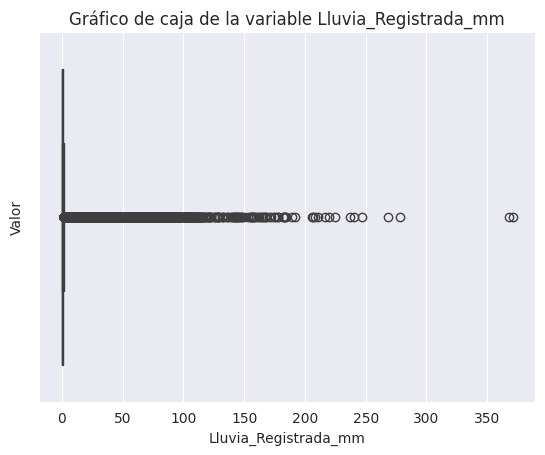

In [ ]:
# Crear un gráfico de caja de la variable MinTemp
sns.boxplot(x=df['Lluvia_Registrada_mm'])

# Añadir título y etiquetas a los ejes
plt.title('Gráfico de caja de la variable Lluvia_Registrada_mm')
plt.xlabel('Lluvia_Registrada_mm')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.show()

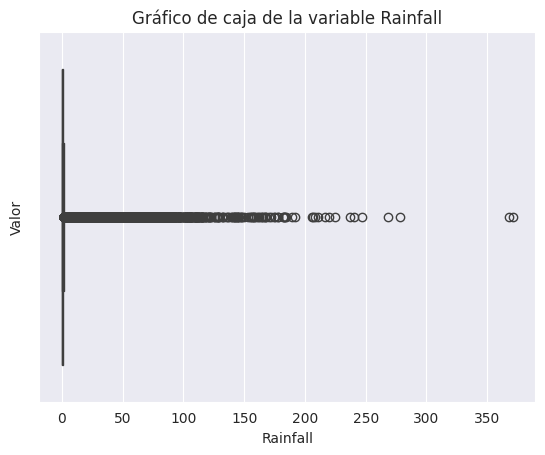

In [ ]:
sns.boxplot(x=df['Lluvia_dia_mm'])

# Añadir título y etiquetas a los ejes
plt.title('Gráfico de caja de la variable Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.show()

Estas dos variables Lluvia_dia_mm y LLuvia_Registrada_mm son variables que tienen una gran cantidad de outliers alredeor del 18 % , estos datos son atipicos y debido a la gran cantidad presente, se debe analizar mas adelante.

Variables sin outliers son : Soleado, Humedad_3pm, Nubes_9am, Nubes_3pm

## Variables Numericas

In [ ]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Ver las primeras filas del DataFrame filtrado
df_numerico.head()


,Temp_minima,Temp_maxima,Lluvia_dia_mm,Evaporacion,Soleado,VelRafaga,Vel_viento9am,Vel_viento3pm,Humedad_9am,Humedad_3pm,presion_atm_9am,presion_atm_3pm,Nubes_9am,Nubes_3pm,Temp9am,Temp3pm,Lluvia_Registrada_mm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2


Se puede visualizar que la presion atmosferica esta en otra escala

## Estadistica Descriptiva

**Variables Numericas**

In [ ]:
df.describe()

,Temp_minima,Temp_maxima,Lluvia_dia_mm,Evaporacion,Soleado,VelRafaga,Vel_viento9am,Vel_viento3pm,Humedad_9am,Humedad_3pm,presion_atm_9am,presion_atm_3pm,Nubes_9am,Nubes_3pm,Temp9am,Temp3pm,Lluvia_Registrada_mm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


* COUNT : Cantidad de datos totales por cada variable. Nos ayuda a identificar la cantidad de datos que tiene cada variables.Se observa que 'Evaporacion', 'Soleado', 'Nubes_9am' y 'Nubes_3pm' son las que tiene una mayor cantidad de nulos.

* MEAN : La media es el promedio de los valores de la variable. Si es cercana a la mediana (50%) y la desviación estándar (STD) es pequeña, sugiere una distribución normal (gaussiana).

*  STD : STD: La desviación estándar mide la dispersión de los valores de la variable alrededor de la media. Una STD alta indica que los valores están muy dispersos, mientras que una STD baja indica que los valores están cerca de la media.

*  CUARTILES : Dividen los datos en cuatro partes iguales, ayudando a entender la distribución y detectar posibles valores atípicos.

**Análisis Descriptivo de los Cuartiles de Temperatura y Precipitación**
Al realizar un análisis preliminar de los datos de temperatura mínima y máxima, así como de las precipitaciones, se pueden observar las siguientes características destacadas en los cuartiles:

**Temperatura Mínima (MinTemp)**
* Primer Cuartil (Q1): La temperatura mínima del primer cuartil varía entre -8.5 y 7.6 grados Celsius, cubriendo un rango de aproximadamente 16 grados. Esto indica una alta variabilidad en las temperaturas más bajas. El 25% de los valores son menores o iguales a 7.6°C.

* Segundo Cuartil (Q2): Entre el primer cuartil y la mediana, la temperatura oscila entre 7.6 y 12 grados Celsius, presentando un rango más estrecho de unos 4.4 grados.El 50% de los valores son menores o iguales a 12.0°C (mediana).

* Tercer Cuartil (Q3): Entre la mediana y el tercer cuartil, la temperatura varía de 12 a 16.8 grados Celsius, con un rango de aproximadamente 4.8 grados.
* Cuarto Cuartil (Q4): La temperatura en el cuarto cuartil oscila entre 16.8 y 33.9 grados Celsius, mostrando un rango de aproximadamente 17 grados. Este rango más amplio sugiere que las temperaturas más altas tienen una mayor dispersión.El 75% de los valores son menores o iguales a 16.8°C.

**Temperatura Máxima (MaxTemp)**
* Primer Cuartil (Q1): La temperatura máxima del primer cuartil se sitúa entre -4.8 y 17.9 grados Celsius, cubriendo un rango de aproximadamente 22.7 grados.
* Segundo Cuartil (Q2): Entre el primer cuartil y la mediana, la temperatura varía entre 17.9 y 22.6 grados Celsius, abarcando un rango de 4.7 grados.
* Tercer Cuartil (Q3): Entre la mediana y el tercer cuartil, la temperatura fluctúa de 22.6 a 28.2 grados Celsius, presentando un rango de 5.6 grados.
* Cuarto Cuartil (Q4): La temperatura en el cuarto cuartil oscila entre 28.2 y 48.1 grados Celsius, con un rango de aproximadamente 19.9 grados, mostrando una mayor dispersión en las temperaturas más altas.

**Lluvia en milimetros  (Lluvia_dia_mm)**
* Primer a Tercer Cuartil (Q1-Q3): La mayoría de los datos de precipitaciones se concentran en valores bajos, ya que los valores de los primeros tres cuartiles (Q1, Q2 y Q3) son todos 0 mm. Esto indica que no  hubo  días con precipitaciones registradas.
* Cuarto Cuartil (Q4): En el cuarto cuartil, las precipitaciones varían entre 0.8 mm y 371 mm, con un rango considerable de aproximadamente 370.2 mm. Esto sugiere que las lluvias fueron escasas pero intensas en ciertos días.El 75% de
los valores son menores o iguales a 0,8mm.

La mayoría de los días no llueve (mediana de 0 mm). Sin embargo, hay días con lluvias muy intensas, lo que explica la alta desviación estándar y el gran rango. Esto sugiere que, aunque rara vez llueve, cuando lo hace, puede ser significativo.

**Humedad_9am:**: La humedad a las 9 AM tiene una desviación estándar de 19.05%, lo que indica una variabilidad considerable. El rango completo de 0% a 100% sugiere que puede haber días extremadamente secos o muy húmedos. La mediana de 70% indica que la mitad de los días tienen una humedad relativa por encima de este valor.

**La humedad_3pm** presenta grandes variaciones entre la mañana y la tarde, lo que podría influir en las condiciones climáticas diarias.

Estos análisis muestran la variabilidad en las temperaturas mínimas y máximas, con una dispersión mayor en los extremos de los cuartiles. Las precipitaciones, por otro lado, muestran que la mayoría de los días tuvieron poca o ninguna lluvia, concentrándose las precipitaciones en eventos menos frecuentes pero más intensos.

**Evaporación**: la Mediana indica que la mitad de los datos tienen valores de evaporación inferiores a 4.8 mm y la otra mitad, superiores. Tiene una desviación estándar de 4.2 mm, hay una variabilidad moderada en los valores de evaporación alrededor de la media.El rango de evaporación va desde 0 hasta 145.0 mm, indicando una variabilidad en las tasas de evaporación observadas.

**Soleado**: En promedio que es la Media, indica que hubieron alrededor de 7 a 8 horas de sol. La Mediana indica que la mitad de los días tuvieron más de 8.5 horas de sol y la otra mitad menos de eso. Es como el punto medio. La desviacion estandar, indica cuánto varían las horas de sol alrededor del promedio de 7 a 8 horas. Una desviación estándar de 3.8 horas , lo que significa que algunas veces hubo más sol del promedio y otras menos.

**Velocidad de Ráfaga** : En promedio, la velocidad máxima de ráfaga de viento fue de aproximadamente 40 km/h. La mediana indica que la mitad de las veces la ráfaga de viento fueron menor a  39 km/h y la otra mitad más. La desviación estándar es de 13.6 km/h, indica  que a veces las ráfagas eran mucho más fuertes o más suaves que el promedio de 40 km/h.

**Lluvia Registrada (mm)** El promedio (Media) se registraron alrededor de 2.4 mm de lluvia en momentos específicos medidos. Es el promedio de cuánta lluvia se midió en esos momentos. La mitad de las mediciones no registraron lluvia ya que es 0.0 mm. Con una desviación estándar de 2.4 mm,a veces la cantidad de lluvia registrada era mucho mayor o menor que el promedio de 2.4 mm.

Esta interpretación permite una mejor comprensión de las características climáticas del set de datos, proporcionando una base  para futuros análisis y modelos predictivos.

## Histograma
Revisamos la distribucion de las variables

Para identificar las variables que tienen a una distribución normal, es útil observar la media y la desviación estándar, así como considerar la simetría de los datos.
- Simetría: La distribución es simétrica alrededor de la media.
- Media y mediana iguales: La media y la mediana son aproximadamente iguales.

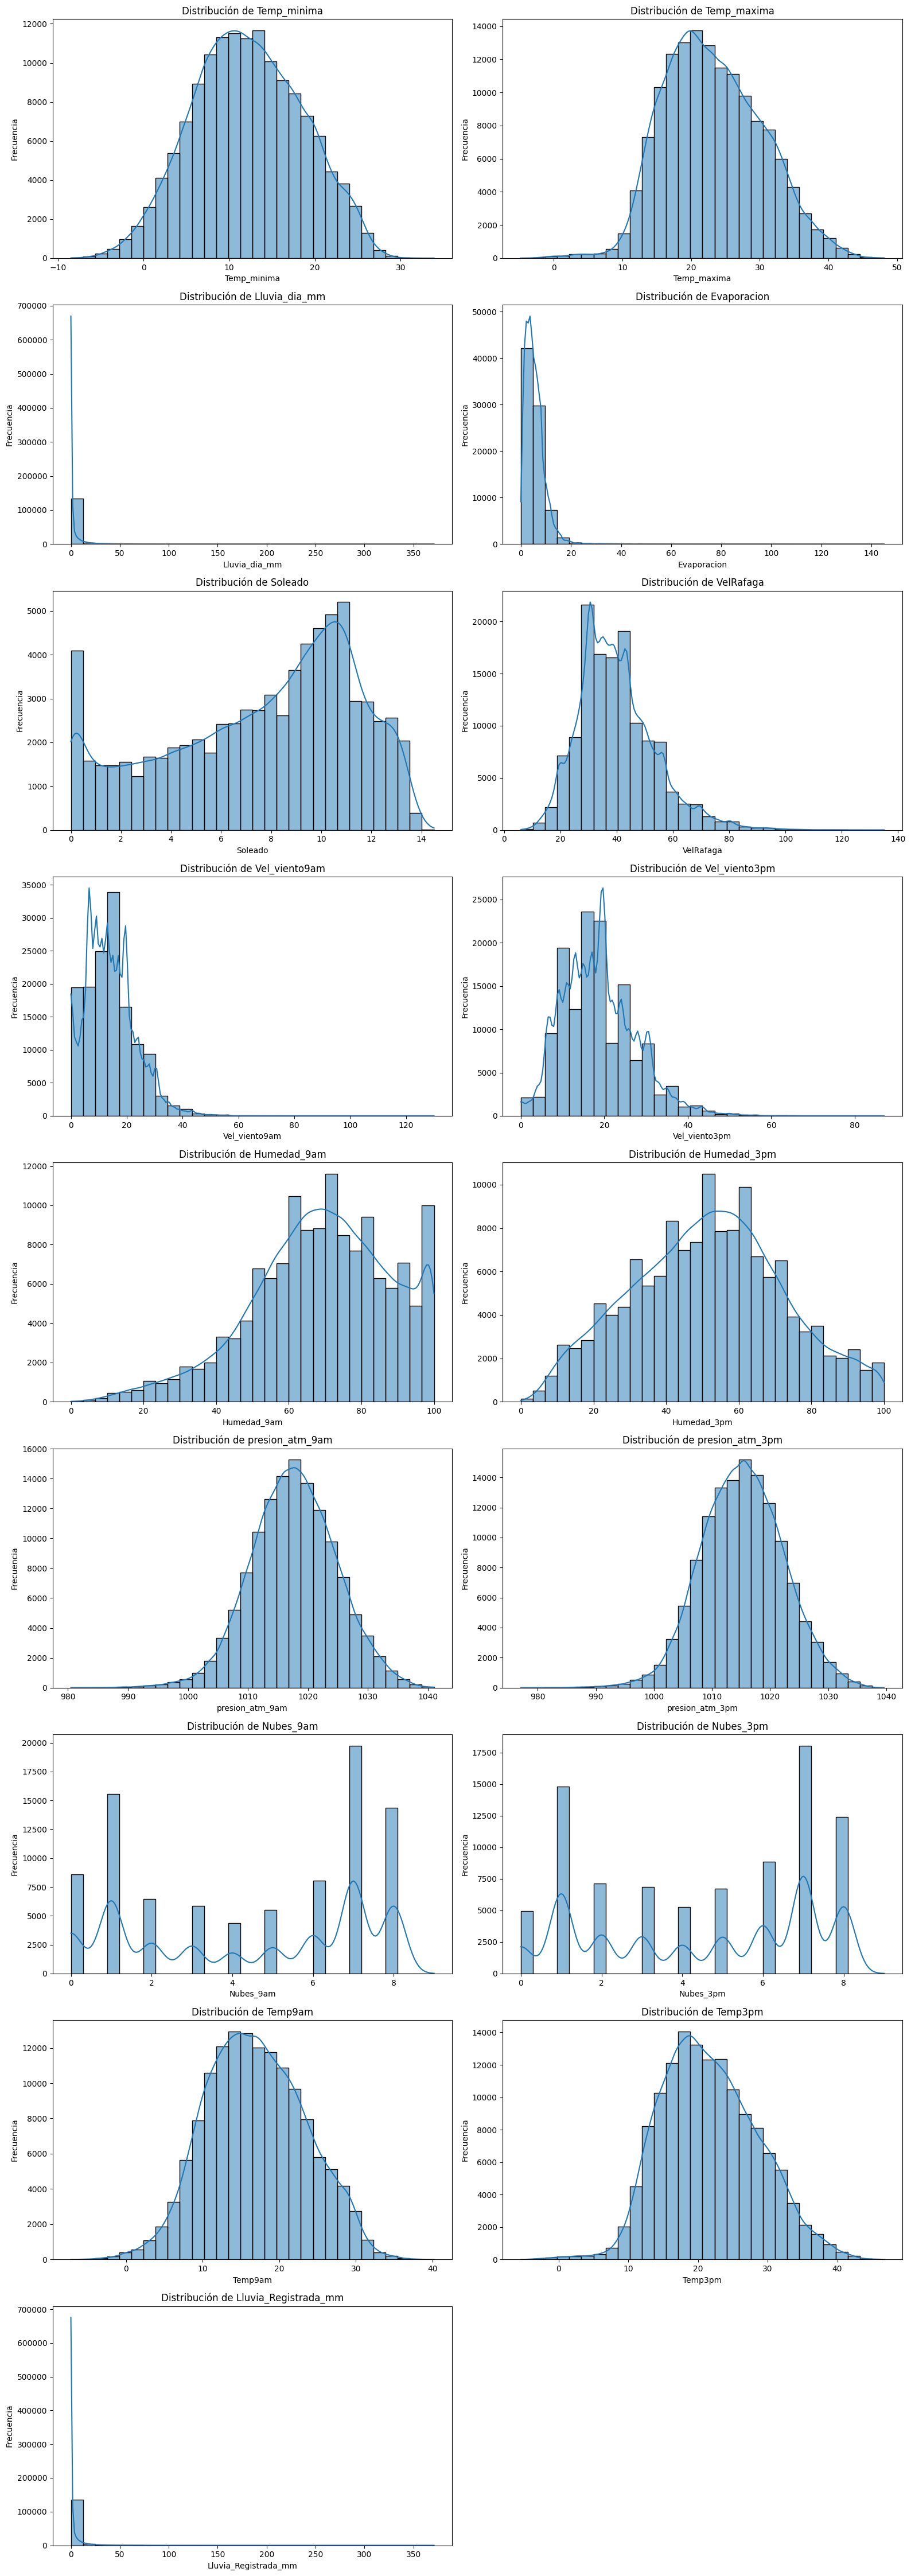

In [ ]:
# Obtener todas las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Configurar el tamaño de las figuras según la cantidad de variables
num_cols = len(numeric_columns)
num_rows = (num_cols + 1) // 2  # Número de filas necesarias para la cuadrícula de 2 columnas

plt.figure(figsize=(16, num_rows * 5))

# Crear un gráfico de distribución para cada variable numérica
for i, var in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i + 1)  # Crear una cuadrícula de num_rows filas y 2 columnas
    sns.histplot(df[var].dropna(), kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Las variables que tienden a distribucion normal:**
- Temp_minima y Temp_maxima:Se observa la forma de campana simetrica, con la mayoria de los valores  en el centro. Ambos tienen una media cercana a la mediana, lo que sugiere una posible distribución normal.Tem_max tiene una pequeña cola hacia la derecha, (asimetria positiva).
- Temp9am y Temp3pm: También muestran una media cercana a la mediana con tendencia a distribucion normal.
- Humedad_9am , Humedad_3pm: ambas indican una distribucion normal con cierta tendencia hacia la derecha.
- Presion_atmos_9am, presion_atmosf_3am se visualizan con tendencia a una distribucion normal.
- Lluvia_mm : Se visualiza que tiene una distribucion asimetrica positiva alta,indica que hay muchos dias con escasa o sin lluvia, y pocos con gran cantidad de lluvia .

**Otras Distribuciones**  
- Evaporacion :Los datos se concentran entre 0 y 20,con una distribucion asimetrica postiva. Se concluye quelos valores bajos son mas comunes que los valores sobre 20s.
- Soleado :La gran cantidad de datos faltantes en esta columna puede confundirse con 0, lo que lleva a una mala interpretación de los datos, sugiriendo incorrectamente que hay muchos momentos sin sol. Es necesario verificar si los ceros son realmente ceros o valores nulos.

- Vel_viento9mm: La media es de 23.23 km/h con una desviación estándar de 7.12 km/h. La mayoría de los datos varían entre 17.9 km/h y 28.2 km/h, con un máximo de 48.1 km/h.

- Vel_viento3pm: La distribución  tiene un asimetria positiva y una cola que se extiende hacia la derecha. Indica  que la velocidad del viento que son más comunes son  baja a moderada velocidad.También hay algunos valores altos.

- Nube_9am : La  fracción del cielo cubierto por nubes a las 9am,los niveles de nubosidad  más frecuentes  como:  1 y 7.
- Nube_3pm : la distribución tiene varios  niveles de nubosidad, resaltan el rango 1 y 7 comolos mas frecuentes.

- Lluvia_Registrada_mm : La mayoria de los datos estan concentrados alrededor  de 0 y 7 , lo que indica que casi no llueve . La distribución es altamente  asimetrica positiva con una cola a la derecha extensa ya que hay algunos valores con mucha lluvia mayor que 350mm.Indicando la presencia de días con lluvia extremadamente alta, aunque son raros.

###Correlacion

Se calcula la correlación de las columnas numéricas lo permite ver fácilmente las relaciones entre las diferentes variables climáticas, destacando tanto las correlaciones positivas como las negativas  

In [ ]:
corr = df.corr(numeric_only=True)
corr


,Temp_minima,Temp_maxima,Lluvia_dia_mm,Evaporacion,Soleado,VelRafaga,Vel_viento9am,Vel_viento3pm,Humedad_9am,Humedad_3pm,presion_atm_9am,presion_atm_3pm,Nubes_9am,Nubes_3pm,Temp9am,Temp3pm,Lluvia_Registrada_mm
Temp_minima,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
Temp_maxima,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Lluvia_dia_mm,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporacion,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Soleado,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
VelRafaga,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
Vel_viento9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
Vel_viento3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humedad_9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humedad_3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


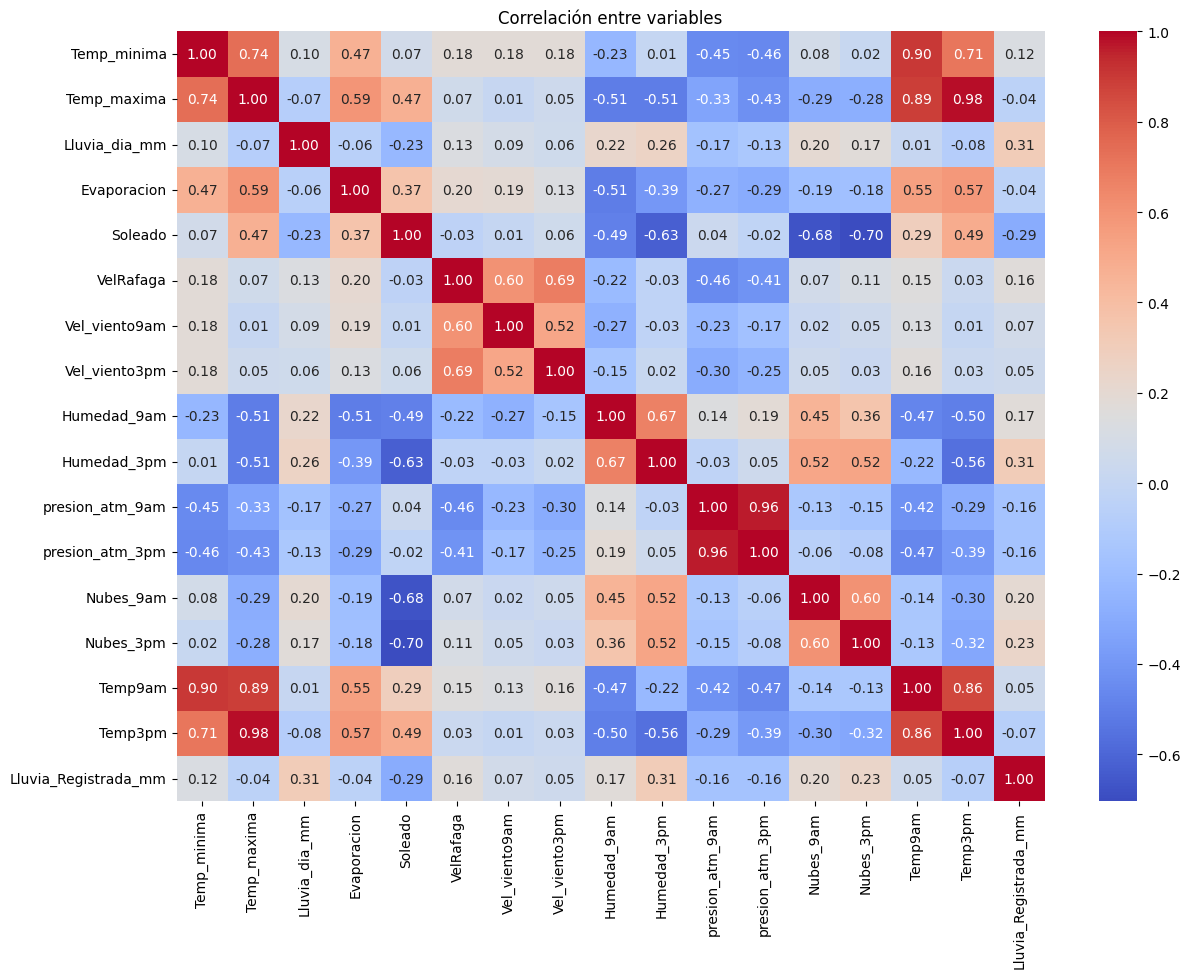

In [ ]:
# Visualizar la correlación entre las variables
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlación entre variables')
plt.show()



Se analiza la correlación que existe en las variables entre si,  teniendo en cuenta que aunque exista correlación no necesariamente implica que exista causalidad.<br>
Se observa que existen correlaciones tanto positivas como negativas.

**Correlaciones Fuertes y Positivas:**
* MinTemp y MaxTemp (0.736): La temperatura mínima y máxima diarias están fuertemente correlacionadas, lo que indica que los días más cálidos tienden a tener tanto temperaturas mínimas como máximas más altas.
* MaxTemp y Temp3pm (0.985): La temperatura máxima del día está muy fuertemente correlacionada con la temperatura a las 3 PM. Se entiende quelas temperaturas más altas del día suelen registrarse por la tarde.
* Temp9am y Temp3pm (0.861): Las temperaturas registradas a las 9 AM y a las 3 PM están fuertemente correlacionadas, indican que si la mañana es cálida, la tarde también lo será.

**Correlaciones Fuertes y Negativas:**
* Temp_maxima y Humedad3pm (-0.509): La temperatura máxima está inversamente correlacionada con la humedad a las 3 PM. Los días más cálidos suelen tener menor humedad por la tarde.
* Soleado y Humedad_3pm (-0.629): La cantidad de horas de sol está inversamente correlacionada con la humedad a las 3 PM, indicando que días más soleados tienden a ser menos húmedos.
* Soleado y Nubes_3pm (-0.704): La cantidad de sol está fuertemente inversamente correlacionada con la nubosidad a las 3 PM. Esto es lógico ya que más sol significa menos nubes.

## Variables Categoricas

In [ ]:
# Seleccionar solo las columnas de tipo object
df_obj = df.select_dtypes(include=['object'])
df_obj

,Fecha,Localidad,DirRafaga,Dir_viento9am,Dir_viento3pm,Lluvia_Hoy,Lluvia_Mañana
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,E,ESE,E,No,No
142189,2017-06-21,Uluru,E,SE,ENE,No,No
142190,2017-06-22,Uluru,NNW,SE,N,No,No
142191,2017-06-23,Uluru,N,SE,WNW,No,No


Estas son las variables Categoricas de este dataset:

In [ ]:
df_obj.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

**Grafico de barra**

Se muestra la frecuencia de cada clase en la respectiva columna ,  permiten visualizar rápidamente qué clase son más comunes en cada variable categórica.
- Tambien permite ver el balanceo de las clases.

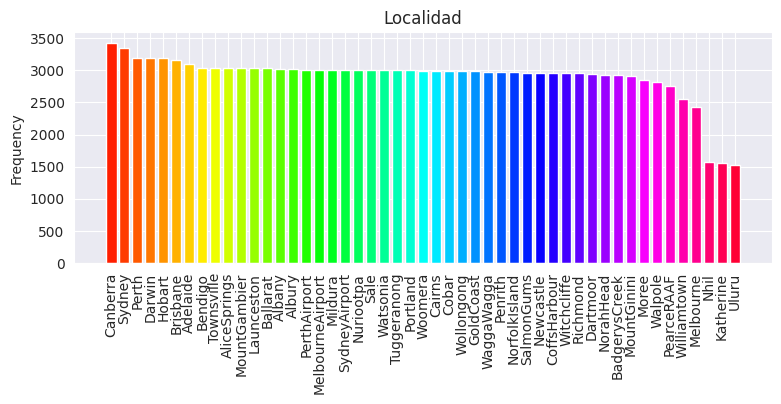

Localidad:
Localidad
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
Badg

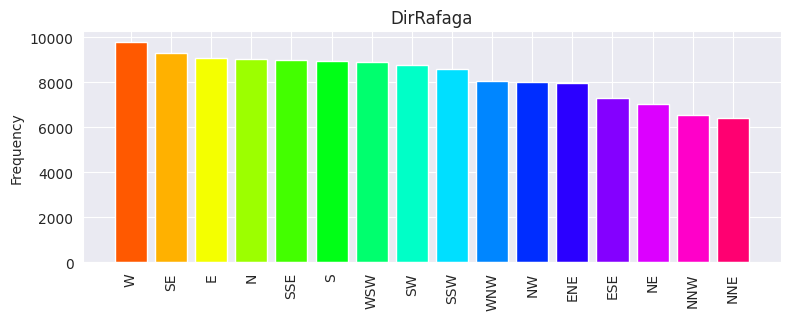

DirRafaga:
DirRafaga
W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: count, dtype: int64


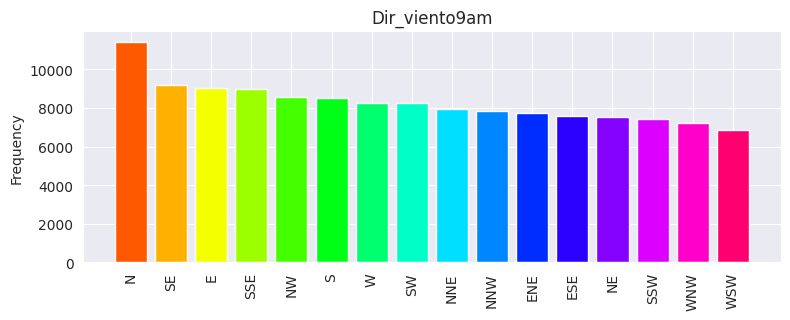

Dir_viento9am:
Dir_viento9am
N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: count, dtype: int64


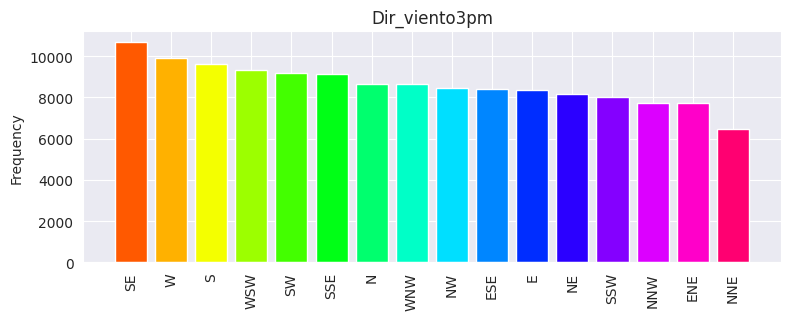

Dir_viento3pm:
Dir_viento3pm
SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: count, dtype: int64


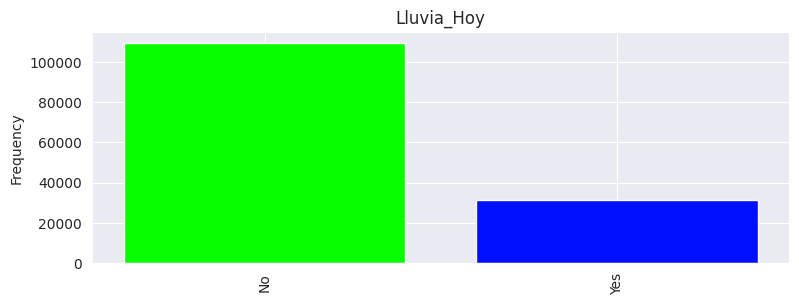

Lluvia_Hoy:
Lluvia_Hoy
No     109332
Yes     31455
Name: count, dtype: int64


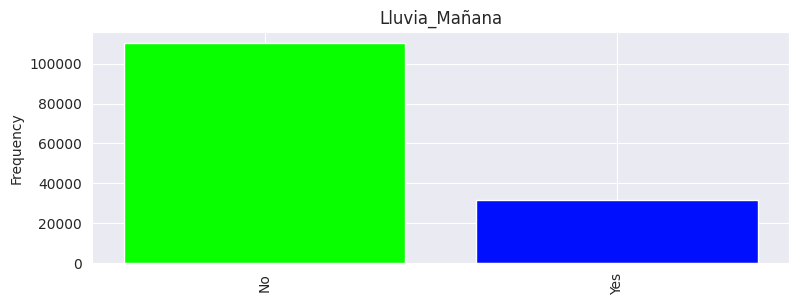

Lluvia_Mañana:
Lluvia_Mañana
No     110316
Yes     31877
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your bar_plot function
def bar_plot(variable):
    # Get feature
    var = df[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # Define a colormap
    colors = sns.color_palette('hsv', len(varValue))

    # Visualize
    plt.figure(figsize=(9, 3))

    plt.bar(varValue.index, varValue, color=colors)

    # Rotate x-ticks for better readability
    plt.xticks(rotation=90)

    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable, varValue))

# Set seaborn style
sns.set_style('darkgrid')

# Convert Fecha to string if it's datetime
df['Fecha'] = df['Fecha'].astype(str)

# Assuming you have a list of categorical variables
categorical_list = [ 'Localidad', 'DirRafaga', 'Dir_viento9am', 'Dir_viento3pm',
       'Lluvia_Hoy', 'Lluvia_Mañana']

# Loop through the list and create bar plots
for c in categorical_list:
    bar_plot(c)


Lluvia_hoy y Lluvia_mañana estan desbalanceadas, significa que una de las clases está mucho más frecuente que la otra. Esto puede afectar la capacidad del  modelo para aprender correctamente las relaciones entre las características y las etiquetas. Se pueden aplicar tecnicas para manejar estas clases, como SMOTE, oversampling, undersampling.

DirRafaga: Mayor cantidad de datos de los vientos son  oeste(W) y sureste(SE),y las cantidades menores son noroeste(NNW) y noreste(NNE)

Dir_viento9am:En la mañana la rafaga del viento predominante es la norte, ya que se concentra la mayor cantidda de datos.

Dir_viento3pm: Direccion de viento predominate es  SE, siguiendo  W, S.

Localidad tiene una distribucion homologenea de datos , pero Nhil, Katherine y Uluru tienen menos datos.

##**Estadísticas descriptivas**

**Variables Categoricas**

- COUNT : Cantidad de datos en la Variable
- UNIQUE : Esto representa la cantidad de datos unicos en la columna.
- TOP : Es el valor mas frecuente de la columna
- FREQ : Este es el numero de veces que se repite el valor de TOP.

In [ ]:
df_obj.describe()

,Fecha,Localidad,DirRafaga,Dir_viento9am,Dir_viento3pm,Lluvia_Hoy,Lluvia_Mañana
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2013-12-01,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


Fecha:   tiene 3436 fechas únicas. Esto significa que en tu conjunto de datos hay 3436 fechas distintas registradas. La gran cantidad de fechas indica que el dataset cubre un largo período de tiempo. La fecha más frecuente apareciendo solo 49 veces sugiere una distribución relativamente uniforme de datos a lo largo del tiempo.

localidad: El dataset abarca datos de 49 diferentes ubicaciones, con Canberra siendo la más representada. Esto podría indicar que Canberra tiene más estaciones de medición o que los datos de esta ubicación se recopilaron con más frecuencia.

DirRafaga: El viento sopla predominantemente desde el oeste (W)en las observaciones, lo cual podría ser relevante para entender patrones climáticos en la región. Tiene 9330 nulos

Dir_viento9am: A las 9 de la mañana, el viento más frecuentemente viene del norte (N). Esto puede ayudar a identificar patrones diurnos en la dirección del viento.Tiene 10.013 nulos

Dir_viento3pm: A las 3 de la tarde, la dirección del viento más común cambia a sureste (SE), lo cual sugiere una posible variación diurna en los patrones del viento.Tiene 3778 datos nulos

Lluvia_hoy: La mayoría de los días no llueve, con una frecuencia alta de "No" en comparación con "Sí". Esto podría indicar un clima predominantemente seco en las ubicaciones registradas.Tiene 1406 nulos.

Lluvia_mañana: Similar a Lluvia_hoy, la previsión para el día siguiente también muestra una alta frecuencia de "No", reforzando la idea de un clima predominantemente seco.

**Inferencias:**

Fecha: Los datos están distribuidos uniformemente a lo largo del tiempo, lo que sugiere un período de observación extenso.

Localidad: Canberra es la ubicación con más datos.

Patrones de Viento: Las direcciones predominantes del viento (W, N, SE) en diferentes momentos del día pueden indicar patrones climáticos regionales importantes.

Lluvia: La frecuencia alta de "No" en Lluvia_hoy y Lluvia_mañana sugiere un clima seco en general, lo cual es crucial para cualquier análisis relacionado con la precipitación.


**Revisan las Clases**

Separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal

In [ ]:
# separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal
for col in df_obj:
  print(f'Columna {col}: {df[col].unique()}{df[col].nunique()} subniveles')

Columna Fecha: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']3436 subniveles
Columna Localidad: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']49 subniveles
Columna DirRafaga: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']16 subniveles
Columna Dir_viento9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']16 subniveles
Columna Dir_viento3pm:

Rango de la fechas es : De 2008-12-01 a 2008-01-31.

Direccion del viento son 16 direcciones unicas

### Ciudades de Australia, que registran su clima

In [ ]:
print(f'Las ciudades en el dataset son: {df["Localidad"].unique()}')
print(f'Siendo un total de {len(df["Localidad"].unique())} ciudades')

Las ciudades en el dataset son: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Siendo un total de 49 ciudades


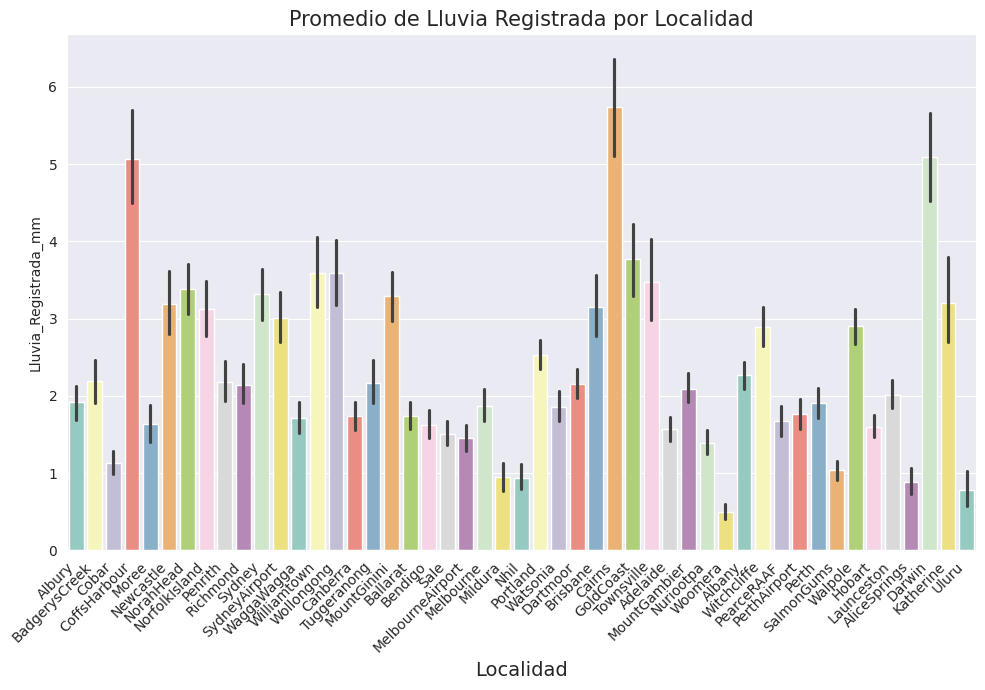

In [ ]:
plt.figure(figsize=(10, 7))  # Tamaño de la figura

# Crear un gráfico de barras usando Seaborn
sns.barplot(x=df['Localidad'], y=df['Lluvia_Registrada_mm'], palette="Set3")

# Etiquetas y título
plt.ylabel('Lluvia_Registrada_mm')  # Etiqueta del eje y
plt.xlabel('Localidad', fontsize=14)  # Etiqueta del eje x con tamaño de fuente
plt.xticks(rotation=45, ha='right')  # Rotación de las etiquetas del eje x para mejor visualización
plt.title('Promedio de Lluvia Registrada por Localidad', fontsize=15)  # Título del gráfico

plt.tight_layout()  # Ajustar el diseño para evitar cortes de etiquetas

plt.show()  # Mostrar el gráfico


Se puede observar que la localidad de las estaciones meteorologicas , que tiene la mayor cantidad de lluvia registrada en mm es Cairns,despues Darwin y en tercer lugar CoffsHarbours. Estas clases se pueden agrupar por region para tener un analisis mas global y comprensible.

In [ ]:
# separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal
for col in df_obj:
  print(f'Columna {col}: {df[col].unique()}{df[col].nunique()} subniveles')

Columna Fecha: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']3436 subniveles
Columna Localidad: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']49 subniveles
Columna DirRafaga: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']16 subniveles
Columna Dir_viento9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']16 subniveles
Columna Dir_viento3pm:

###**Variable Fecha**


La variable Fecha se descompone para identificar los peridos de lluvia segun el año y el mes , para entender el comportamiemto meteorologico segun estacion del año.

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

In [ ]:
# Descompone la fecha
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day
df['Dia_semana'] = df['Fecha'].dt.dayofweek  # Lunes=0, Domingo=6
df['Día_nombre'] = df['Fecha'].dt.day_name()

# Mostrar el DataFrame con las nuevas columnas
df.head()


,Fecha,Localidad,Temp_minima,Temp_maxima,Lluvia_dia_mm,Evaporacion,Soleado,DirRafaga,VelRafaga,Dir_viento9am,...,Temp9am,Temp3pm,Lluvia_Hoy,Lluvia_Registrada_mm,Lluvia_Mañana,Año,Mes,Día,Dia_semana,Día_nombre
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,16.9,21.8,No,0.0,No,2008,12,1,0,Monday
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,17.2,24.3,No,0.0,No,2008,12,2,1,Tuesday
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,21.0,23.2,No,0.0,No,2008,12,3,2,Wednesday
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,18.1,26.5,No,1.0,No,2008,12,4,3,Thursday
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,17.8,29.7,No,0.2,No,2008,12,5,4,Friday


In [ ]:
categoricas_columna= ['Fecha', 'Localidad','Día_nombre']  # Lista de columnas categóricas originales
df_categ = df[categoricas_columna].copy()

In [ ]:
df_categ.head()

,Fecha,Localidad,Día_nombre
0,2008-12-01,Albury,Monday
1,2008-12-02,Albury,Tuesday
2,2008-12-03,Albury,Wednesday
3,2008-12-04,Albury,Thursday
4,2008-12-05,Albury,Friday


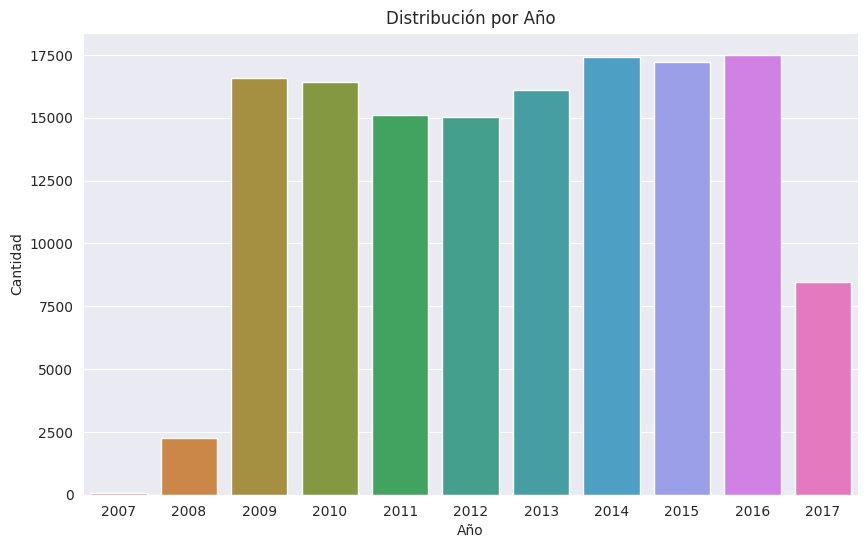

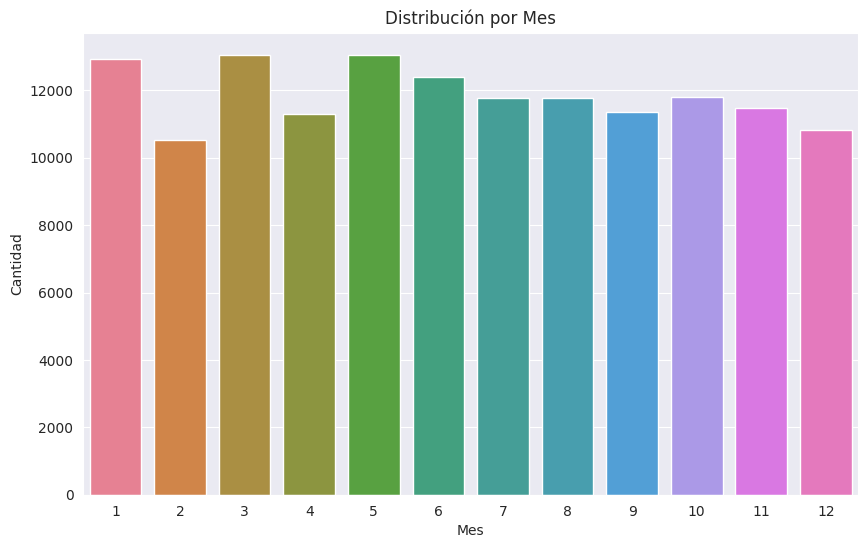

In [ ]:
# Contar la cantidad de ocurrencias por año
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Año', data=df, palette='husl', ax=ax)
ax.set_title('Distribución por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
plt.show()

# Contar la cantidad de ocurrencias por mes
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Mes', data=df, palette='husl', ax=ax)
ax.set_title('Distribución por Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')
plt.show()

Los gráficos de año y meses nos muestran una distribucion :

Años:  La mayoría de los años tiene una cantidad de datos equilibrado , excepto para 2007 y 2008, que tienen menos datos.

Meses: Esta distribucion tiene una cantidad de datos por mes bastante equilibrada .







# Fase 3. Preparación de los Datos

Preprocesamiento de Datos:

 Limpiar los datos, manejar valores faltantes, transformar variables categóricas  

**Limpieza de Datos**

Se preparan los datos de manera adecuada para evitar problemas de sobreajuste o subajuste en los modelos y  se realizan  las siguientes transformaciones:




In [ ]:
# Comprobar qué columnas están presentes en el DataFrame
print("Columnas disponibles en el DataFrame:", df.columns)


Columnas disponibles en el DataFrame: Index(['Fecha', 'Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'Evaporacion', 'Soleado', 'DirRafaga', 'VelRafaga', 'Dir_viento9am',
       'Dir_viento3pm', 'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am',
       'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am',
       'Nubes_3pm', 'Temp9am', 'Temp3pm', 'Lluvia_Hoy', 'Lluvia_Registrada_mm',
       'Lluvia_Mañana', 'Año', 'Mes', 'Día', 'Dia_semana', 'Día_nombre'],
      dtype='object')


##Manejo de Valores Nulos

Se imputan los valores nulos por la media

###**Imputación basada en agrupación**

**Variable MinTemp**

 **MinTemp**: Evaluamos los valores nulos, tiene 637 datos

In [ ]:
df["Temp_minima"].isna().sum()

637

In [ ]:
df["Temp_minima"].mean()

12.186399728729265

Se calcula el promedio de la temperatura mínima (MinTemp) para cada ubicación (Location) del conjunto de datos.

In [ ]:
promedio_minTemp= df.groupby("Localidad")["Temp_minima"].mean()
promedio_minTemp

Localidad
Adelaide            12.628368
Albany              12.948461
Albury               9.520899
AliceSprings        13.125182
BadgerysCreek       11.136900
Ballarat             7.355302
Bendigo              8.591065
Brisbane            16.410998
Cairns              21.199197
Canberra             6.827688
Cobar               13.120342
CoffsHarbour        14.365774
Dartmoor             8.619816
Darwin              23.210530
GoldCoast           17.341490
Hobart               9.079141
Katherine           20.534983
Launceston           7.833818
Melbourne           11.788127
MelbourneAirport     9.973945
Mildura             10.733954
Moree               12.786255
MountGambier         8.827468
MountGinini          3.651193
Newcastle           13.740240
Nhil                 8.992798
NorahHead           15.375197
NorfolkIsland       16.839960
Nuriootpa            9.366433
PearceRAAF          12.386314
Penrith             12.533649
Perth               12.922706
PerthAirport        12.580359



Ahora se reemplazan los valores faltantes en la columna "MinTemp" del DataFrame utilizando el promedio de la temperatura mínima para cada ubicación. Con este codigo reemplazamos los valores nulos de esa columna y mantenemos los promedios originales

In [ ]:
df["Temp_minima"] = df["Temp_minima"].fillna(df.groupby("Localidad")["Temp_minima"].transform("mean"))

Y de esa manera nos deshacemos de los valores nulos de esa columna mientras mantenemos los promedios originales

In [ ]:
df["Temp_minima"].isna().sum()

0

Se revisa nuevamente la variable Temp_minima, y se observa que no tiene valores nulos.

**Cantidad de valores nulos en varias columnas específicas del df**

In [ ]:
print(f'Cantidad de valores nulos en columna Temp_maxima: {df["Temp_maxima"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humedad_9am: {df["Humedad_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humedad_3pm: {df["Humedad_3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Vel_viento9am: {df["Vel_viento9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Vel_viento3pm: {df["Vel_viento3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna presion_atm_9am: {df["presion_atm_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna presion_atm_3pm: {df["presion_atm_3pm"].isna().sum()}')

Cantidad de valores nulos en columna Temp_maxima: 322
Cantidad de valores nulos en columna Humedad_9am: 1774
Cantidad de valores nulos en columna Humedad_3pm: 3610
Cantidad de valores nulos en columna Temp9am: 904
Cantidad de valores nulos en columna Temp3pm: 2726
Cantidad de valores nulos en columna Vel_viento9am: 1348
Cantidad de valores nulos en columna Vel_viento3pm: 2630
Cantidad de valores nulos en columna presion_atm_9am: 14014
Cantidad de valores nulos en columna presion_atm_3pm: 13981


**Imputación de los valores nulos**
Se utiliza el promedio de los valores no nulos agrupados por la columna "Location".

In [ ]:
df["Temp_maxima"] = df["Temp_maxima"].fillna(df.groupby("Localidad")["Temp_maxima"].transform("mean"))

df["Humedad_9am"] = df["Humedad_9am"].fillna(df.groupby("Localidad")["Humedad_9am"].transform("mean"))
df["Humedad_3pm"] = df["Humedad_3pm"].fillna(df.groupby("Localidad")["Humedad_3pm"].transform("mean"))

df["Temp9am"] = df["Temp9am"].fillna(df.groupby("Localidad")["Temp9am"].transform("mean"))
df["Temp3pm"] = df["Temp3pm"].fillna(df.groupby("Localidad")["Temp3pm"].transform("mean"))

df["Vel_viento9am"] = df["Vel_viento9am"].fillna(df.groupby("Localidad")["Vel_viento9am"].transform("mean"))
df["Vel_viento3pm"] = df["Vel_viento3pm"].fillna(df.groupby("Localidad")["Vel_viento3pm"].transform("mean"))

df["presion_atm_9am"] = df["presion_atm_9am"].fillna(df.groupby("Localidad")["presion_atm_9am"].transform("mean"))
df["presion_atm_3pm"] = df["presion_atm_3pm"].fillna(df.groupby("Localidad")["presion_atm_3pm"].transform("mean"))


En resumen, este código realiza una imputación de los valores nulos en las columnas mencionadas utilizando el promedio de los valores no nulos agrupados por la ubicación. Esto ayuda a preservar la coherencia geográfica en los datos al imputar valores faltantes

In [ ]:
print(f'Cantidad de valores nulos en columna Temp_maxima: {df["Temp_maxima"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humedad_9am: {df["Humedad_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humedad_3pm: {df["Humedad_3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Vel_viento9am: {df["Vel_viento9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Vel_viento3pm: {df["Vel_viento3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna presion_atm_9am: {df["presion_atm_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna presion_atm_3pm: {df["presion_atm_3pm"].isna().sum()}')

Cantidad de valores nulos en columna Temp_maxima: 0
Cantidad de valores nulos en columna Humedad_9am: 0
Cantidad de valores nulos en columna Humedad_3pm: 0
Cantidad de valores nulos en columna Temp9am: 0
Cantidad de valores nulos en columna Temp3pm: 0
Cantidad de valores nulos en columna Vel_viento9am: 0
Cantidad de valores nulos en columna Vel_viento3pm: 0
Cantidad de valores nulos en columna presion_atm_9am: 11781
Cantidad de valores nulos en columna presion_atm_3pm: 11781


###**Imputar por la mediana**

Se imputa por la Mediana para datos con distribuciones sesgadas o cuando hay outliers.

**Variable presion_atm_3pm, presion_atm_9am**

In [ ]:
subnulos = df[['Localidad', 'presion_atm_9am', 'presion_atm_3pm']]

# Contar la cantidad de valores nulos por ubicación
nulos_local = subnulos.groupby('Localidad').apply(lambda x: x.isnull().sum())

# Mostrar solo las ubicaciones con valores nulos y la cantidad de nulos en las columnas especificadas
print(nulos_local[nulos_local.sum(axis=1) > 0])


             Localidad  presion_atm_9am  presion_atm_3pm
Localidad                                               
MountGinini          0             2907             2907
Newcastle            0             2955             2955
Penrith              0             2964             2964
SalmonGums           0             2955             2955


El hecho de que todavía existan valores nulos en las columnas "presion_atm_9am" y "presion_atm_3pm" después de la imputación utilizando el promedio agrupado por ubicación , ocurre porque algunas ubicaciones tienen muchos valores nulos en esas columnas, lo que afecta la capacidad de la imputación basada en la media agrupada por ubicación.<br>
Dado que la variación en la presión atmosférica no es muy significativa y que hay relativamente pocos valores nulos en comparación con el tamaño total del conjunto de datos, se utiliza la mediana del conjunto de datos completo para imputar estos valores nulos, ya que la mediana es menos sensible a valores atípicos que la media.

In [ ]:
# Calcular la mediana de las columnas 'presion_atm_9am' y 'Pressure3pm'
median_presion_atm_9am = df['presion_atm_9am'].median()
median_pressure3pm = df['presion_atm_3pm'].median()

# Llenar los valores faltantes con la mediana calculada
df['presion_atm_9am'].fillna(median_presion_atm_9am, inplace=True)
df['presion_atm_3pm'].fillna(median_pressure3pm, inplace=True)


In [ ]:
print(f'Cantidad de valores nulos en columna Pressure9am después de la imputación: {df["presion_atm_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm después de la imputación: {df["presion_atm_3pm"].isna().sum()}')


Cantidad de valores nulos en columna Pressure9am después de la imputación: 0
Cantidad de valores nulos en columna Pressure3pm después de la imputación: 0


**Escalamiento**

Para hacer el escalamiento , se divide el valor de presión en hPa por el factor de conversión 68,947, lo que proporciona el valor equivalente en psi.

In [ ]:
print( df['presion_atm_3pm'].sample(1) )
print( df['presion_atm_9am'].sample(1) )

101467    1024.4
Name: presion_atm_3pm, dtype: float64
130574    1014.3
Name: presion_atm_9am, dtype: float64


In [ ]:
df['presion_atm_3pm'] = df['presion_atm_3pm'] / 68.947
df['presion_atm_9am'] = df['presion_atm_9am'] / 68.947


In [ ]:
print( df['presion_atm_3pm'].sample(1) )
print( df['presion_atm_9am'].sample(1) )

136505    14.621376
Name: presion_atm_3pm, dtype: float64
1784    14.807026
Name: presion_atm_9am, dtype: float64


**Variables Nubes_3pm y Nubes_9am**

Usaremos la mediana para imputar los datos faltantes.

Nubes_3pm  y Nubes_9am: indica fracción del cielo cubierto por nubes y qué tan nublado estaba el cielo segun hora del dia.

In [ ]:
df[['Nubes_9am','Nubes_3pm']].isna().sum()

Nubes_9am    53657
Nubes_3pm    57094
dtype: int64

In [ ]:
df["Nubes_9am"] = df.groupby("Localidad")["Nubes_9am"].transform(lambda x: x.fillna(x.mean()))
df["Nubes_3pm"] = df.groupby("Localidad")["Nubes_3pm"].transform(lambda x: x.fillna(x.mean()))


In [ ]:
print(f'Cantidad de valores nulos en columna Nubes_9am: {df["Nubes_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Nubes_3pm: {df["Nubes_3pm"].isna().sum()}')


Cantidad de valores nulos en columna Nubes_9am: 34034
Cantidad de valores nulos en columna Nubes_3pm: 34034


In [ ]:
df["Nubes_9am"] = df["Nubes_9am"].fillna(df.groupby("Localidad")["Nubes_9am"].transform("median"))
df["Nubes_3pm"] = df["Nubes_3pm"].fillna(df.groupby("Localidad")["Nubes_3pm"].transform("median"))

In [ ]:

print(f'Cantidad de valores nulos en columna Nubes_9am: {df["Nubes_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Nubes_3pm: {df["Nubes_3pm"].isna().sum()}')

Cantidad de valores nulos en columna Nubes_9am: 34034
Cantidad de valores nulos en columna Nubes_3pm: 34034


Revisamos la localidad para las variables  , ya que al parecer existen localidades donde todos sus datos son nulos por lo cual no se puede determinar la mediana.

In [ ]:
subnulos = df[['Localidad', 'Nubes_9am', 'Nubes_3pm']]

# Contar la cantidad de valores nulos por ubicación
nulos_local = subnulos.groupby('Localidad').apply(lambda x: x.isnull().sum())

# Mostrar solo las ubicaciones con valores nulos y la cantidad de nulos en las columnas especificadas
print(nulos_local[nulos_local.sum(axis=1) > 0])

               Localidad  Nubes_9am  Nubes_3pm
Localidad                                     
Adelaide               0       3090       3090
BadgerysCreek          0       2928       2928
Dartmoor               0       2943       2943
GoldCoast              0       2980       2980
MountGinini            0       2907       2907
Nhil                   0       1569       1569
NorahHead              0       2929       2929
Penrith                0       2964       2964
SalmonGums             0       2955       2955
Tuggeranong            0       2998       2998
Walpole                0       2819       2819
Witchcliffe            0       2952       2952


Los valores nulos se mantienen en ciertas localidades a pesar de la imputación por grupo. Esto sugiere que, para algunas localidades, todas las observaciones en las columnas Nubes_9am y Nubes_3pm son nulas, lo que hace que la imputación basada en la mediana de esas localidades sea ineficaz.

In [ ]:
# Paso 1: Imputar valores nulos con la media de cada grupo 'Localidad'
df["Nubes_9am"] = df.groupby("Localidad")["Nubes_9am"].transform(lambda x: x.fillna(x.mean()))
df["Nubes_3pm"] = df.groupby("Localidad")["Nubes_3pm"].transform(lambda x: x.fillna(x.mean()))

# Paso 2: Imputar cualquier valor nulo restante con la media global
df["Nubes_9am"] = df["Nubes_9am"].fillna(df["Nubes_9am"].mean())
df["Nubes_3pm"] = df["Nubes_3pm"].fillna(df["Nubes_3pm"].mean())

# Verificar la imputación de valores nulos
print(f'Cantidad de valores nulos en columna Nubes_9am: {df["Nubes_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Nubes_3pm: {df["Nubes_3pm"].isna().sum()}')


Cantidad de valores nulos en columna Nubes_9am: 0
Cantidad de valores nulos en columna Nubes_3pm: 0


Agrupamos por Localidad y rellenamos los nulos con la media del grupo.

 Para cualquier valor nulo restante, rellenamos con la media global de la columna.

In [ ]:
df.isnull().sum()

Fecha                       0
Localidad                   0
Temp_minima                 0
Temp_maxima                 0
Lluvia_dia_mm            1406
Evaporacion             60843
Soleado                 67816
DirRafaga                9330
VelRafaga                9270
Dir_viento9am           10013
Dir_viento3pm            3778
Vel_viento9am               0
Vel_viento3pm               0
Humedad_9am                 0
Humedad_3pm                 0
presion_atm_9am             0
presion_atm_3pm             0
Nubes_9am                   0
Nubes_3pm                   0
Temp9am                     0
Temp3pm                     0
Lluvia_Hoy               1406
Lluvia_Registrada_mm        0
Lluvia_Mañana               0
Año                         0
Mes                         0
Día                         0
Dia_semana                  0
Día_nombre                  0
dtype: int64

###**Imputacion por Moda :**

Cuando hay un valor que se repite con mayor frecuencia ,puede ser útil para variables numéricas discretas y comúnmente utilizado para variables categóricas

**Variable VelRafaga**

Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.

In [ ]:
df['VelRafaga'].mode()

0    35.0
Name: VelRafaga, dtype: float64

In [ ]:
print( df['VelRafaga'].sample(5) )

7905       NaN
69291     35.0
23149     46.0
101999    37.0
9565      56.0
Name: VelRafaga, dtype: float64


In [ ]:
df[["VelRafaga"]].isna().sum()

VelRafaga    9270
dtype: int64

In [ ]:
df['VelRafaga'] = df['VelRafaga'].fillna(df['VelRafaga'].mode()[0])

In [ ]:
df[["VelRafaga"]].isna().sum()

VelRafaga    0
dtype: int64

###**Eliminan nulos : Variable Lluvia_Hoy**

In [ ]:
print(df['Lluvia_Hoy'].isnull().sum())


1406


La cantidad de registros por ciudad en el dataset variaron muy poco respecto al total general.

In [ ]:
null_rain_today_by_Localidad = df.groupby('Localidad')['Lluvia_Hoy'].apply(lambda x: x.isnull().sum())
print(null_rain_today_by_Localidad)


Localidad
Adelaide             70
Albany               20
Albury               20
AliceSprings          6
BadgerysCreek        51
Ballarat             11
Bendigo               4
Brisbane             29
Cairns               24
Canberra             16
Cobar                 8
CoffsHarbour         13
Dartmoor              4
Darwin                0
GoldCoast            56
Hobart                5
Katherine            14
Launceston            8
Melbourne           137
MelbourneAirport      0
Mildura               2
Moree                63
MountGambier          8
MountGinini          91
Newcastle            26
Nhil                  4
NorahHead            41
NorfolkIsland        20
Nuriootpa             6
PearceRAAF          116
Penrith              53
Perth                 0
PerthAirport          0
Portland             12
Richmond             45
Sale                  8
SalmonGums           14
Sydney                6
SydneyAirport         4
Townsville            6
Tuggeranong          39
Uluru 

Resumen de la cantidad de valores nulos en 'RainToday' para cada ubicación en tu conjunto de datos.<br>
 Al observar cuántos registros hay por ubicación, se puede determinar si hay ciudades con muy pocos registros. Si el número de registros para una ubicación es bajo y se eliminan los registros nulos en la columna RainToday,puede ocurrir que se eliminen todas las entradas para esa ubicación. Es para prevenir que se pierdan registros que revisamos antes de eliminar los valores nulos.

In [ ]:
df.shape

(142193, 29)

In [ ]:
df = df.dropna(subset=['Lluvia_Hoy'])

La cantidad de registros por ciudad en el dataset variaron muy poco respecto al total general.

In [ ]:
df.isnull().sum()

Fecha                       0
Localidad                   0
Temp_minima                 0
Temp_maxima                 0
Lluvia_dia_mm               0
Evaporacion             59694
Soleado                 66805
DirRafaga                9163
VelRafaga                   0
Dir_viento9am            9660
Dir_viento3pm            3670
Vel_viento9am               0
Vel_viento3pm               0
Humedad_9am                 0
Humedad_3pm                 0
presion_atm_9am             0
presion_atm_3pm             0
Nubes_9am                   0
Nubes_3pm                   0
Temp9am                     0
Temp3pm                     0
Lluvia_Hoy                  0
Lluvia_Registrada_mm        0
Lluvia_Mañana               0
Año                         0
Mes                         0
Día                         0
Dia_semana                  0
Día_nombre                  0
dtype: int64

###**Valores Nulos datos Categoricos**

Ahora procedemos a tratar los valores nulos de las columnas de direccion del viento, variables que son de tipo categorica y por ello no podemos usar el promedio como lo hicimos antes, esta vez utilizaremos la moda ya que es el valor que mas se repite

In [ ]:
df.columns

Index(['Fecha', 'Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'Evaporacion', 'Soleado', 'DirRafaga', 'VelRafaga', 'Dir_viento9am',
       'Dir_viento3pm', 'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am',
       'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am',
       'Nubes_3pm', 'Temp9am', 'Temp3pm', 'Lluvia_Hoy', 'Lluvia_Registrada_mm',
       'Lluvia_Mañana', 'Año', 'Mes', 'Día', 'Dia_semana', 'Día_nombre'],
      dtype='object')

'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object'

In [ ]:
# Rellenar valores nulos con la moda utilizando .loc para evitar SettingWithCopyWarning

df.loc[:, 'DirRafaga'] = df['DirRafaga'].fillna(df['DirRafaga'].mode()[0])
df.loc[:, 'Dir_viento9am'] = df['Dir_viento9am'].fillna(df['Dir_viento9am'].mode()[0])
df.loc[:, 'Dir_viento3pm'] = df['Dir_viento3pm'].fillna(df['Dir_viento3pm'].mode()[0])


In [ ]:
df.isna().sum()

Fecha                       0
Localidad                   0
Temp_minima                 0
Temp_maxima                 0
Lluvia_dia_mm               0
Evaporacion             59694
Soleado                 66805
DirRafaga                   0
VelRafaga                   0
Dir_viento9am               0
Dir_viento3pm               0
Vel_viento9am               0
Vel_viento3pm               0
Humedad_9am                 0
Humedad_3pm                 0
presion_atm_9am             0
presion_atm_3pm             0
Nubes_9am                   0
Nubes_3pm                   0
Temp9am                     0
Temp3pm                     0
Lluvia_Hoy                  0
Lluvia_Registrada_mm        0
Lluvia_Mañana               0
Año                         0
Mes                         0
Día                         0
Dia_semana                  0
Día_nombre                  0
dtype: int64

In [ ]:
df_completo=df.copy()


In [ ]:
df=df_completo.copy()

###**Eliminar Variables**

Las variables Evaporation y Sunshine no son representativas para este estudio, que esta relacionado  la variable objetivo RainTomorrow que significa si llueve o no llueve.

Soleado                 67816 nulos

Evaporacion             60843 nulos

Estas variables al tener tantos nulos mas del 30 % de los datos y para nuestro analisis no son tan relevantes se eliminaran mas adelante

In [ ]:
subnulos = df[['Localidad','Soleado', 'Evaporacion']]

# Contar la cantidad de valores nulos por ubicación
nulos_local = subnulos.groupby('Localidad').apply(lambda x: x.isnull().sum())

# Mostrar solo las ubicaciones con valores nulos y la cantidad de nulos en las columnas especificadas
print(nulos_local[nulos_local.sum(axis=1) > 0])

                  Localidad  Soleado  Evaporacion
Localidad                                        
Adelaide                  0     1368         1372
Albany                    0      494          270
Albury                    0     2991         2991
AliceSprings              0      505          205
BadgerysCreek             0     2877         2877
Ballarat                  0     3017         3017
Bendigo                   0     3030         1845
Brisbane                  0       48           19
Cairns                    0      403          317
Canberra                  0     1898         1586
Cobar                     0     2430          322
CoffsHarbour              0     1451         1161
Dartmoor                  0      440          407
Darwin                    0        3           54
GoldCoast                 0     2924         2924
Hobart                    0       14            7
Katherine                 0     1545           72
Launceston                0     3020         2879


Se imputan por la media global ya que hay muchas localidades con cero datos para calcular su mediana por agrupacion de localidad.

In [ ]:
df = df.drop(["Evaporacion", "Soleado"], axis =1)

In [ ]:
df.drop('Día_nombre', axis=1, inplace=True)
df.drop('Día', axis=1, inplace=True)
df.drop('Dia_semana', axis=1, inplace=True)


In [ ]:
df = df.drop(["Año", "Mes"], axis =1)

##Revisamos el nuevo dataset

In [ ]:
df.shape

(140787, 22)

In [ ]:
df.isnull().sum().sum()

0

Ahora no existen valore nulos .

In [ ]:
df1 = df.copy()


In [ ]:
df=df1.copy()

##**Outliers**:







Columna 'Humedad_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%


Columna 'Soleado' tiene 0 outliers.
Porcentaje de outliers: 0.00%

Columna 'Nubes_9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%

Columna 'Nubes_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%

Columna 'Temp_minima' tiene 62 outliers.
Porcentaje de outliers: 0.04%

Columna 'Temp_maxima' tiene 459 outliers.
Porcentaje de outliers: 0.32%

Columna 'Lluvia_dia_mm' tiene 25228 outliers.
Porcentaje de outliers: 17.74%

Columna 'Evaporacion' tiene 1954 outliers.
Porcentaje de outliers: 1.37%


Columna 'VelRafaga' tiene 3006 outliers.
Porcentaje de outliers: 2.11%

Columna 'Vel_viento9am' tiene 1739 outliers.
Porcentaje de outliers: 1.22%

Columna 'Vel_viento3pm' tiene 2458 outliers.
Porcentaje de outliers: 1.73%

Columna 'Humedad_9am' tiene 1419 outliers.
Porcentaje de outliers: 1.00%

Columna 'presion_atm_9am' tiene 1174 outliers.
Porcentaje de outliers: 0.83%

Columna 'presion_atm_3pm' tiene 906 outliers.
Porcentaje de outliers: 0.64%

Columna 'Temp9am' tiene 247 outliers.
Porcentaje de outliers: 0.17%

Columna 'Temp3pm' tiene 735 outliers.
Porcentaje de outliers: 0.52%

Columna 'Lluvia_Registrada_mm' tiene 25573 outliers.
Porcentaje de outliers: 17.98%

Porcentaje total de outliers en todo el dataset: 17.98%
Cantidad total de outliers en todo el dataset: 613752

###Grafico de Cajas

In [ ]:
df.columns

Index(['Fecha', 'Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'DirRafaga', 'VelRafaga', 'Dir_viento9am', 'Dir_viento3pm',
       'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm',
       'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm',
       'Temp9am', 'Temp3pm', 'Lluvia_Hoy', 'Lluvia_Registrada_mm',
       'Lluvia_Mañana'],
      dtype='object')

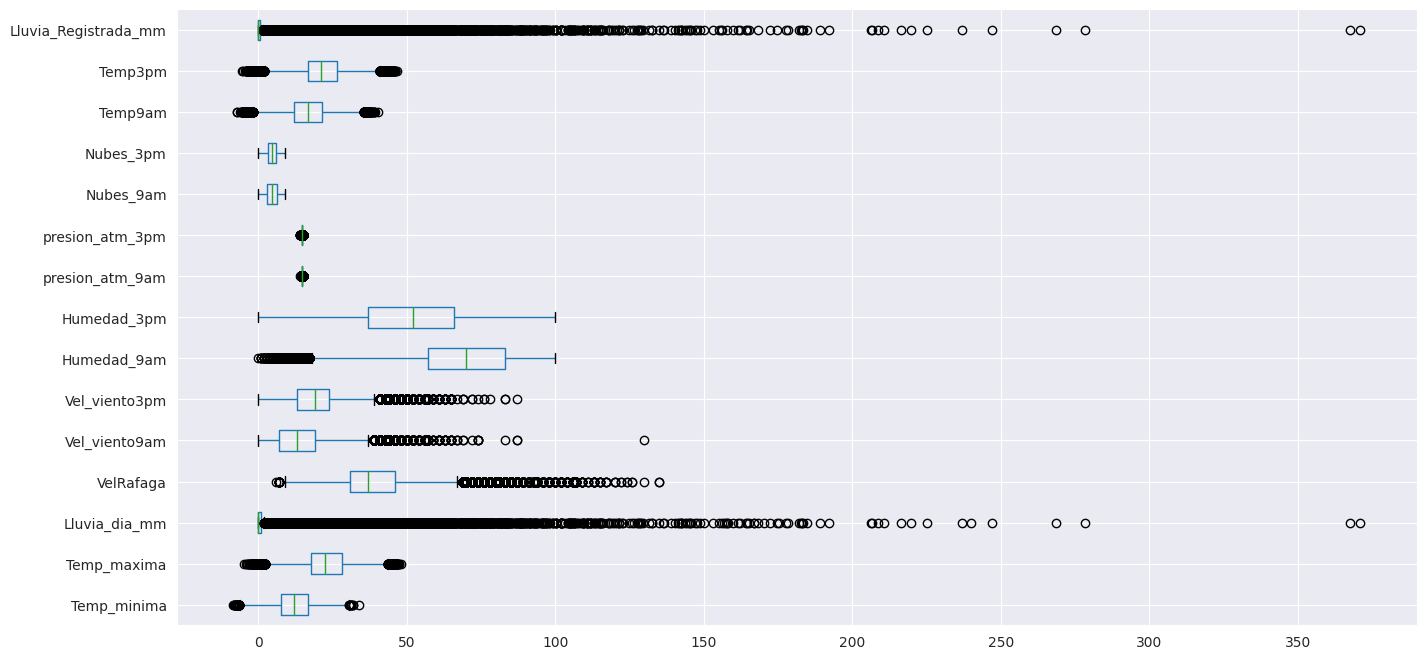

In [ ]:
plt.figure(figsize=(16,8))
df.boxplot(column=['Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'VelRafaga', 'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am',
       'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am',
       'Nubes_3pm', 'Temp9am', 'Temp3pm', 'Lluvia_Registrada_mm'], vert=False)
plt.show()

**Metodo Clip para Outliers**

Se trataran solo las variables con outliers. Anteriormente se definen variables sin outliers estas son:
Columna 'Humedad_3pm' tiene 0 outliers. Porcentaje de outliers: 0.00%

Columna 'Soleado' tiene 0 outliers. Porcentaje de outliers: 0.00%

Columna 'Nubes_9am' tiene 0 outliers. Porcentaje de outliers: 0.00%

Columna 'Nubes_3pm' tiene 0 outliers. Porcentaje de outliers: 0.00

**Rango intercuartil** :  Se Identifican los outliers.  Este enfoque es especialmente útil cuando los datos no siguen una distribución normal.

Se utiliza método clip() , que no  elimina los valores atípicos (outliers), sino que los ajusta para que estén dentro del rango especificado. Donde los valores que estén por encima del límite superior serán establecidos en el valor del límite superior, y los valores que estén por debajo del límite inferior serán establecidos en el valor del límite inferior. Esto significa que los valores atípicos se ajustaran para que estén dentro del rango permitido, en lugar de eliminarlos por completo.








In [ ]:
col_outliers = ['Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'VelRafaga', 'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am', 'presion_atm_9am', 'presion_atm_3pm', 'Temp9am', 'Temp3pm', 'Lluvia_Registrada_mm']

# Calcular el rango intercuartílico (IQR)

Q1 = df[col_outliers].quantile(0.25)
Q3 = df[col_outliers].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Aplicar el método clip utilizando los valores de lower y upper a todas las columnas en la lista 'columna'
df[col_outliers] = df[col_outliers].clip(lower=lower, upper=upper, axis=1)


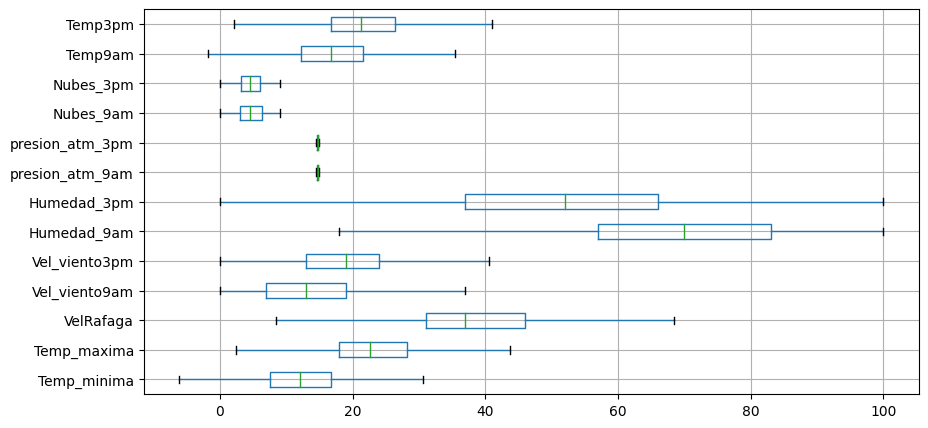

In [ ]:
plt.figure(figsize=(10,5))
df.boxplot(column=['Temp_minima', 'Temp_maxima','VelRafaga', 'Vel_viento9am', 'Vel_viento3pm',
             'Humedad_9am', 'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm', 'Temp9am', 'Temp3pm'], vert=False)
plt.show()

In [ ]:
# Obtener todas las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in df[numeric_columns].columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        outliers_count = outliers.sum()
        outliers_percentage = outliers.mean() * 100

        print(f"Columna '{column}' tiene {outliers_count} outliers.")
        print(f"Porcentaje de outliers: {outliers_percentage:.2f}%")
        print("---")

total_outliers = sum(outliers.sum() for column in df.columns)
total_entries = len(df) * len(df.columns)
total_percentage = total_outliers / total_entries * 100

print(f"Porcentaje total de outliers en todo el dataset: {total_percentage:.2f}%")
print(f"Cantidad total de outliers en todo el dataset: {total_outliers}")

Columna 'Temp_minima' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Temp_maxima' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Lluvia_dia_mm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'VelRafaga' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Vel_viento9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Vel_viento3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Humedad_9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Humedad_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'presion_atm_9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'presion_atm_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Nubes_9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Nubes_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Temp9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Temp3pm' tiene 0 outliers

Graficamos para visualizar los outliers . No hay outliers

<Figure size 1200x800 with 0 Axes>

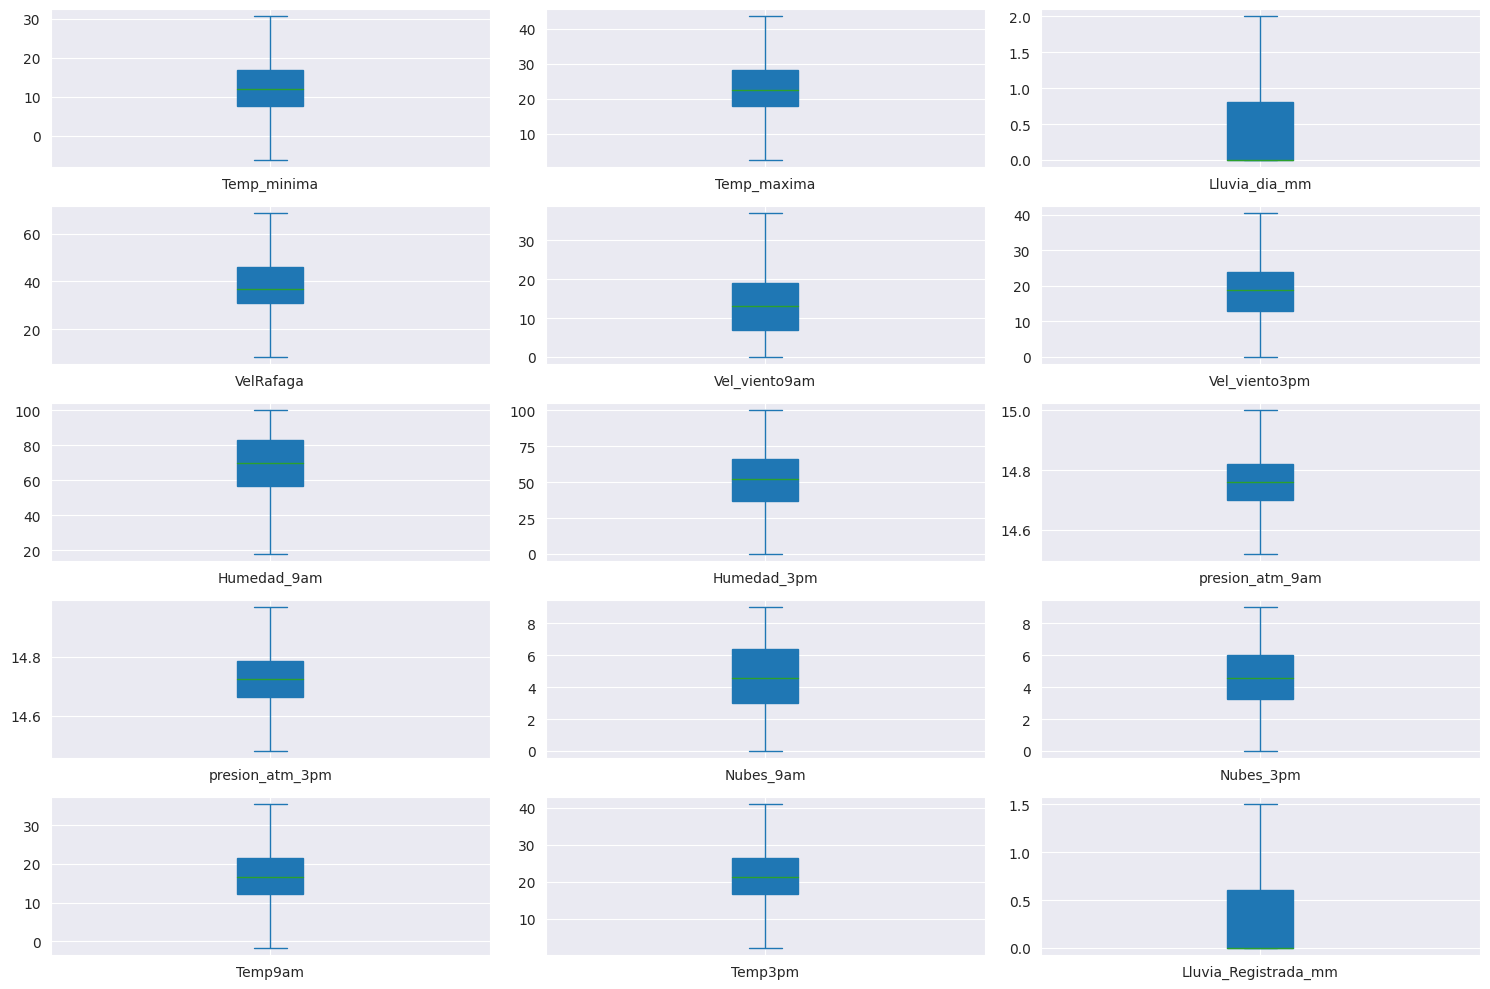

In [ ]:
# Crear un gráfico de caja
numericos_columns = df.select_dtypes(include=['float64', 'float32']).columns

plt.figure(figsize=(12, 8))
df[numericos_columns].plot(kind='box', subplots=True, layout=(int(np.ceil(len(numericos_columns) / 3)), 3), figsize=(15, 10), patch_artist=True)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

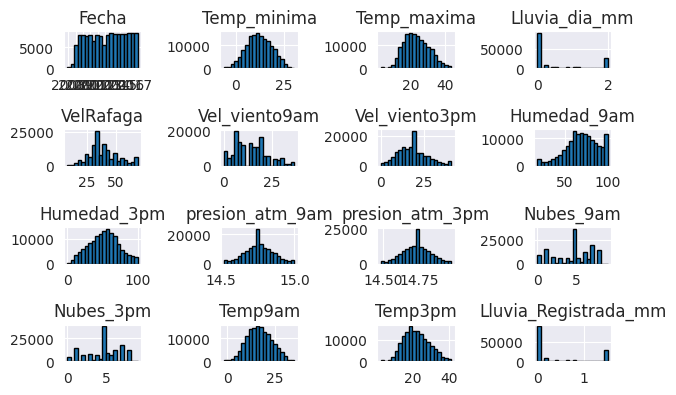

In [ ]:
# Definir el tamaño de la figura y el diseño de subplots
plt.figure(figsize=(12, 8))
df.hist(bins=20, layout=(int(len(df.columns)/4), 4), edgecolor='black')
plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()

In [ ]:
df_nuevo= df.copy()

###**Transformacion Variables Categoricas**




Para manejar y transformar variables categóricas, existen varias técnicas dependiendo del tipo de análisis y modelo a utilizar.

In [ ]:
# Seleccionar solo las columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Iterar sobre las columnas categóricas y mostrar sus valores únicos
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Columna '{column}' tiene los siguientes valores únicos: {unique_values}")
    print("---")


Columna 'Localidad' tiene los siguientes valores únicos: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
---
Columna 'DirRafaga' tiene los siguientes valores únicos: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
---
Columna 'Dir_viento9am' tiene los siguientes valores únicos: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
---
Columna 'Dir_viento3pm' tiene los siguientes valores único

In [ ]:
df_obj.columns

Index(['Fecha', 'Localidad', 'DirRafaga', 'Dir_viento9am', 'Dir_viento3pm',
       'Lluvia_Hoy', 'Lluvia_Mañana'],
      dtype='object')

In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
for col in df_obj:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna Fecha: 3436 subniveles
Columna Localidad: 49 subniveles
Columna DirRafaga: 16 subniveles
Columna Dir_viento9am: 16 subniveles
Columna Dir_viento3pm: 16 subniveles
Columna Lluvia_Hoy: 2 subniveles
Columna Lluvia_Mañana: 2 subniveles


##Transformacion Variables Categoricas

###**Variable Localidad**


In [ ]:
# Crear un diccionario con la asignación de números a cada ciudad
city_mapping = {
    'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4,
    'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9,
    'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13,
    'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17,
    'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22,
    'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27,
    'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32,
    'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37,
    'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42,
    'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47,
    'Uluru': 48
}

# Aplicar el mapeo a la columna 'Location'
df['Localidad'] = df['Localidad'].replace(city_mapping)

In [ ]:
df.shape

(140787, 22)

###**Variable DirRafaga,Dir_viento3pm,Dir_viento9am**

Cada una de estas clases representa una dirección específica de donde proviene el viento en el momento en que se tomó la medición. La dirección del viento es crucial en las condiciones  meteorológicas y climáticas, ya que influye en el clima local y las condiciones atmosféricas.

In [ ]:
# Obtener los valores únicos en 'DirRafaga'
unique_dir_rafaga = df['DirRafaga'].unique()
print("Valores únicos en 'DirRafaga':", unique_dir_rafaga)

# Obtener los valores únicos en 'Dir_viento3pm'
unique_dir_viento3pm = df['Dir_viento3pm'].unique()
print("Valores únicos en 'Dir_viento3pm':", unique_dir_viento3pm)

# Obtener los valores únicos en 'Dir_viento9am'
unique_dir_viento9am = df['Dir_viento9am'].unique()
print("Valores únicos en 'Dir_viento9am':", unique_dir_viento9am)


Valores únicos en 'DirRafaga': ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
Valores únicos en 'Dir_viento3pm': ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
Valores únicos en 'Dir_viento9am': ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']


W: Oeste

WNW: Oeste Noroeste

WSW: Oeste Suroeste

NE: Noreste

NNW: Noroeste Noroeste

N: Norte

NNE: Noreste Noreste

SW: Suroeste

ENE: Este Noreste

SSE: Suroeste Suroeste

S: Sur

NW: Noroeste

SE: Sureste

ESE: Este Sureste

E: Este

SSW: Suroeste Suroeste


In [ ]:
# Obtener los valores únicos en 'WindGustDir'
unique_values = df['DirRafaga'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindGustDir'
df['DirRafaga'] = df['DirRafaga'].replace(mapping)


In [ ]:
# Obtener los valores únicos en 'WindDir3pm'
unique_values = df['Dir_viento9am'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindDir3pm'
df['Dir_viento9am'] = df['Dir_viento9am'].replace(mapping)

In [ ]:
# Obtener los valores únicos en 'WindDir3pm'
unique_values = df['Dir_viento3pm'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindDir3pm'
df['Dir_viento3pm'] = df['Dir_viento3pm'].replace(mapping)

In [ ]:
df.shape

(140787, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Fecha                 140787 non-null  datetime64[ns]
 1   Localidad             140787 non-null  int64         
 2   Temp_minima           140787 non-null  float64       
 3   Temp_maxima           140787 non-null  float64       
 4   Lluvia_dia_mm         140787 non-null  float64       
 5   DirRafaga             140787 non-null  int64         
 6   VelRafaga             140787 non-null  float64       
 7   Dir_viento9am         140787 non-null  int64         
 8   Dir_viento3pm         140787 non-null  int64         
 9   Vel_viento9am         140787 non-null  float64       
 10  Vel_viento3pm         140787 non-null  float64       
 11  Humedad_9am           140787 non-null  float64       
 12  Humedad_3pm           140787 non-null  float64       
 13  pres

###**Eliminan Variable**

In [ ]:
df.drop([ 'Fecha'],axis=1, inplace=True)

In [ ]:
df.shape

(140787, 21)

###**Transformacion variables objetivo**

En el caso de variables binarias como "Lluvia_Mañana" y "Lluvia mañana", ambos métodos map , ya que solo hay dos valores posibles (0 y 1).

In [ ]:
df["Lluvia_Hoy"] = df["Lluvia_Hoy"].map({ "No":0, "Yes":1 })
df["Lluvia_Mañana"] = df["Lluvia_Mañana"].map({ "No":0, "Yes":1 })

In [ ]:
df[['Lluvia_Mañana', 'Lluvia_Hoy']].sample(5)


,Lluvia_Mañana,Lluvia_Hoy
10732,0,0
43074,0,0
38409,0,0
12044,0,0
90841,0,0


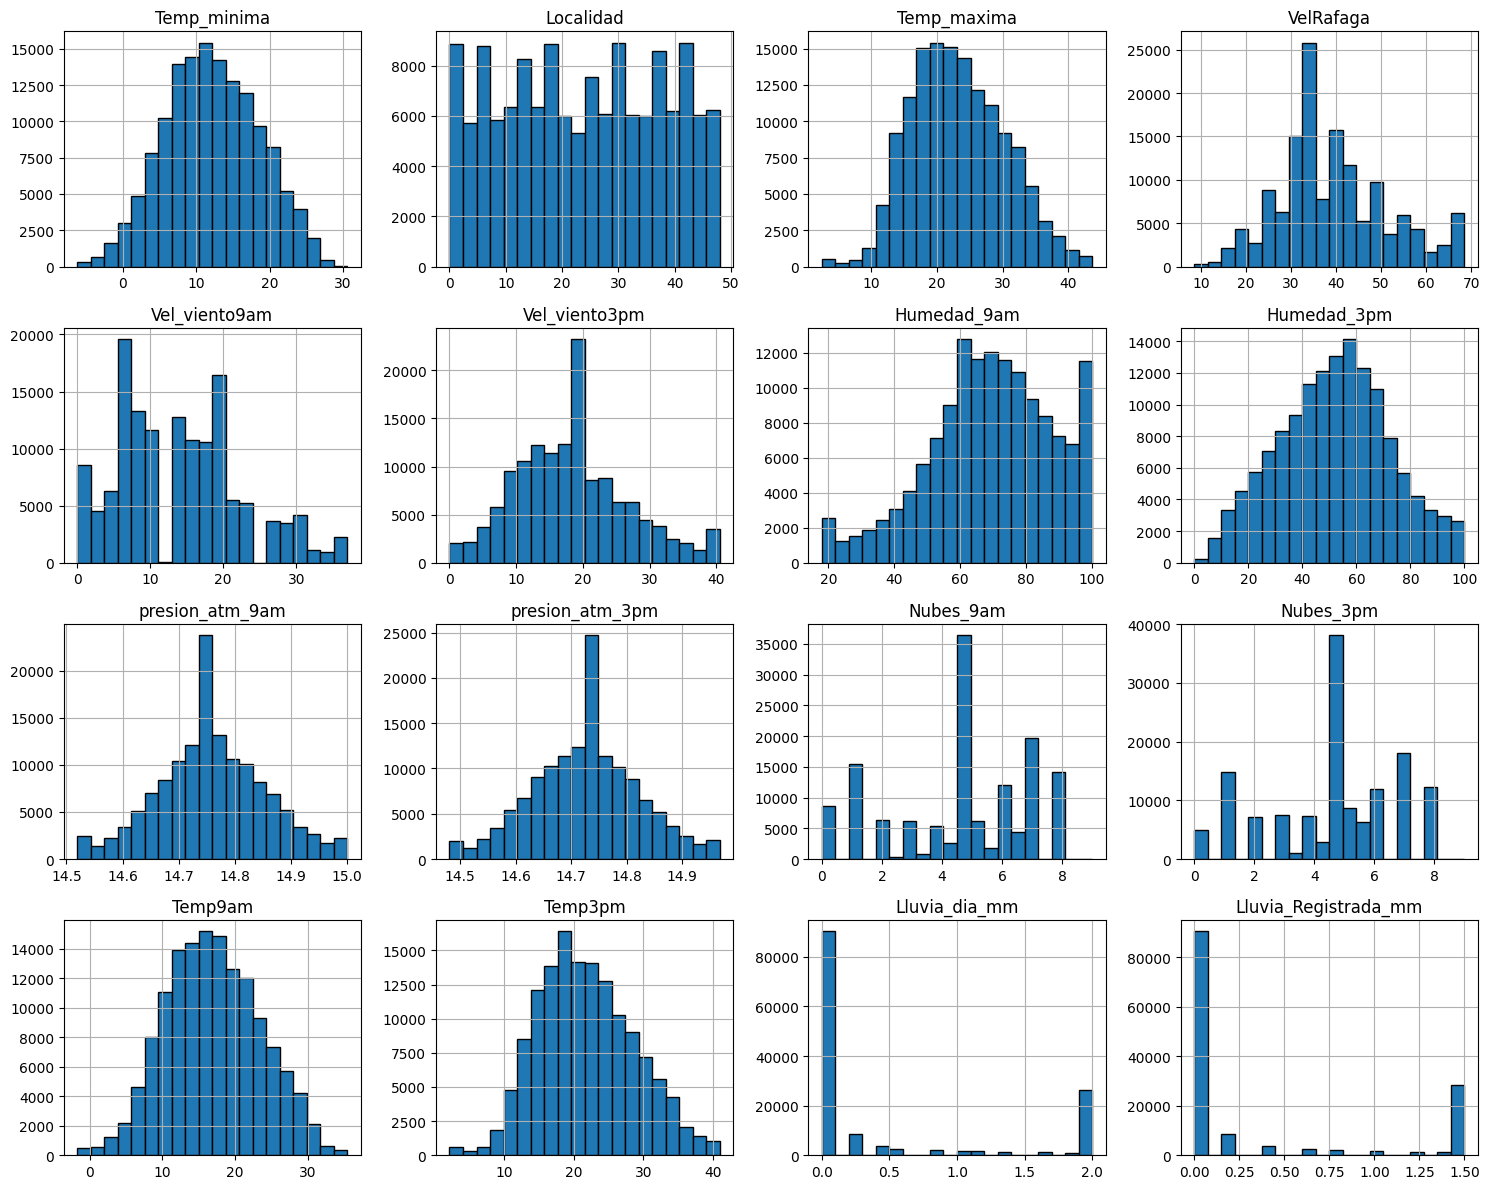

In [ ]:
import matplotlib.pyplot as plt

# Definir las columnas específicas a graficar
numeric_columns = ['Temp_minima','Localidad' ,'Temp_maxima', 'VelRafaga', 'Vel_viento9am',
                   'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm', 'presion_atm_9am',
                   'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm', 'Temp9am', 'Temp3pm','Lluvia_dia_mm',
        'Lluvia_Registrada_mm']

# Crear un gráfico de caja para cada columna numérica

# Calcular el número de subplots necesarios
num_plots = len(numeric_columns)

# Definir el tamaño de la figura y el diseño de subplots adecuado
cols_per_subplot = 4
rows = (num_plots - 1) // cols_per_subplot + 1  # Calcular el número de filas necesario

# Crear la figura y los subplots
plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(numeric_columns):
    plt.subplot(rows, cols_per_subplot, i + 1)
    df[col].hist(bins=20, edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()


Columnas con distribución normal para estandarizar:

Temp_minima
Temp_maxima
Vel_viento3pm
Humedad_9am
Humedad_3pm
presion_atm_9am
presion_atm_3pm
Temp9am
Temp3pm

Columnas con distribución no normal para escalar:

VelRafaga
Vel_viento9am
Nubes_9am
Nubes_3pm

Normalizaremos las características para que las características que tienen no tiene una distribucion normal.<br>

Al observar las formas de la distribución de cada característica, normalizaremos las características , aquellas que no tengan una forma de campana.<br>


##**Estandarización**:

Ajusta los datos para que tengan una media de 0 y una desviación estándar de 1.
Utiliza StandardScaler para las columnas con distribución normal.

##**Normalización:**

Ajusta los datos para que se encuentren en un rango específico, generalmente entre 0 y 1.
Utiliza MinMaxScaler para las columnas con distribución no normal.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seleccionar las columnas para estandarizar
columns_to_standardize = ['Temp_minima', 'Temp_maxima', 'Vel_viento3pm', 'Humedad_9am',
                          'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Temp9am', 'Temp3pm']

# Seleccionar las columnas para normalizar
columns_to_normalize = ['VelRafaga', 'Vel_viento9am', 'Nubes_9am', 'Nubes_3pm']

# Inicializar los scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Estandarizar los datos
df[columns_to_standardize] = standard_scaler.fit_transform(df[columns_to_standardize])

# Normalizar los datos
df[columns_to_normalize] = minmax_scaler.fit_transform(df[columns_to_normalize])

# Ver los primeros registros del DataFrame
print(df.head())


   Localidad  Temp_minima  Temp_maxima  Lluvia_dia_mm  DirRafaga  VelRafaga  \
0          0     0.189490    -0.047787            0.6          0   0.591667   
1          0    -0.748711     0.262380            0.0          1   0.591667   
2          0     0.111307     0.346972            0.0          2   0.625000   
3          0    -0.467251     0.671238            0.0          3   0.258333   
4          0     0.830595     1.277475            1.0          0   0.541667   

   Dir_viento9am  Dir_viento3pm  Vel_viento9am  Vel_viento3pm  ...  \
0              0              0       0.540541       0.649428  ...   
1              1              1       0.108108       0.413306  ...   
2              0              1       0.513514       0.885551  ...   
3              2              2       0.297297      -1.121493  ...   
4              3              3       0.189189       0.177183  ...   

   Humedad_3pm  presion_atm_9am  presion_atm_3pm  Nubes_9am  Nubes_3pm  \
0    -1.432724        -1.51225

##**Variable Objetivo : 'Lluvia_Mañana'**

In [ ]:
df['Lluvia_Mañana'].value_counts()

Lluvia_Mañana
0    109586
1     31201
Name: count, dtype: int64

Revisa la distribución de las observaciones respecto de la variable que se usará
para la clasificación

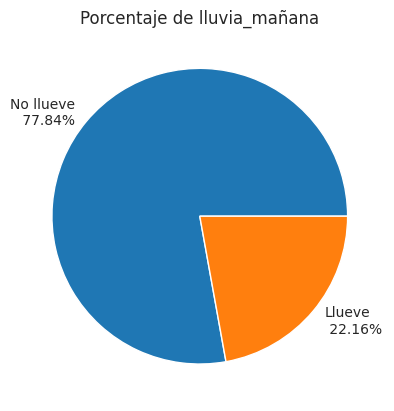

In [ ]:
# Gráfico de tortas del porcentaje de muestras llueve y no llueve

clases = np.array([df[df.Lluvia_Mañana == 0.0].shape[0],df[df.Lluvia_Mañana == 1.0].shape[0]])
# Creando las leyendas del grafico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
labels[0] = 'No llueve\n ' + labels[0]
labels[1] = 'Llueve\n ' + labels[1]
plt.pie(clases, labels=labels)
plt.title('Porcentaje de lluvia_mañana')
plt.show()

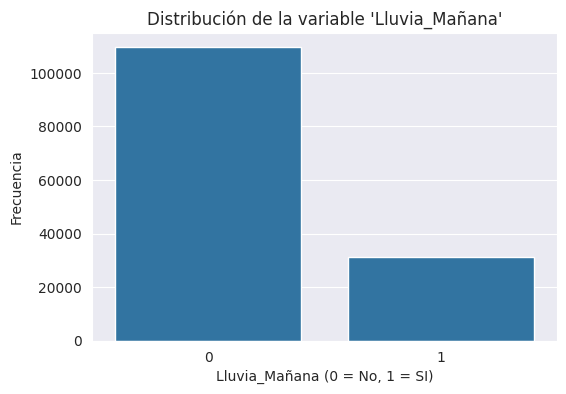

In [ ]:
# Visualizar el balance
plt.figure(figsize=(6, 4))
sns.countplot(x='Lluvia_Mañana', data=df)
plt.title("Distribución de la variable 'Lluvia_Mañana'")
plt.xlabel("Lluvia_Mañana (0 = No, 1 = SI)")
plt.ylabel("Frecuencia")
plt.show()

La variable Lluvia_mañana está desbalanceada, con 109.586 instancias de la clase 0 (No) y 31.201 instancias de la clase 1 (Sí). Esto afecta el rendimiento de los modelos de aprendizaje automático, especialmente si la clase minoritaria (lluvia yes) es la que te interesa predecir con mayor precisión.

##**Data frame de cada Modelo (df original)**

In [ ]:
df2=df.copy()

In [ ]:
df.columns

Index(['Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm', 'DirRafaga',
       'VelRafaga', 'Dir_viento9am', 'Dir_viento3pm', 'Vel_viento9am',
       'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm', 'presion_atm_9am',
       'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm', 'Temp9am', 'Temp3pm',
       'Lluvia_Hoy', 'Lluvia_Registrada_mm', 'Lluvia_Mañana'],
      dtype='object')

array([[<Axes: title={'center': 'Localidad'}>,
        <Axes: title={'center': 'Temp_minima'}>,
        <Axes: title={'center': 'Temp_maxima'}>,
        <Axes: title={'center': 'Lluvia_dia_mm'}>,
        <Axes: title={'center': 'DirRafaga'}>],
       [<Axes: title={'center': 'VelRafaga'}>,
        <Axes: title={'center': 'Dir_viento9am'}>,
        <Axes: title={'center': 'Dir_viento3pm'}>,
        <Axes: title={'center': 'Vel_viento9am'}>,
        <Axes: title={'center': 'Vel_viento3pm'}>],
       [<Axes: title={'center': 'Humedad_9am'}>,
        <Axes: title={'center': 'Humedad_3pm'}>,
        <Axes: title={'center': 'presion_atm_9am'}>,
        <Axes: title={'center': 'presion_atm_3pm'}>,
        <Axes: title={'center': 'Nubes_9am'}>],
       [<Axes: title={'center': 'Nubes_3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>,
        <Axes: title={'center': 'Lluvia_Hoy'}>,
        <Axes: title={'center': 'Lluvia_Registrada_mm'}>],
       [

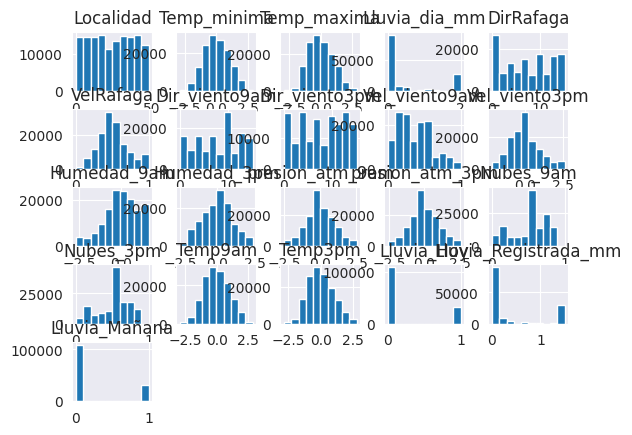

In [ ]:
df.hist()

In [ ]:

features = ['Temp_minima', 'Vel_viento3pm','presion_atm_3pm','presion_atm_9am','Temp3pm','Humedad_3pm','Humedad_9am', 'Temp9am', 'Nubes_9am','Lluvia_Mañana']


# Crear el nuevo DataFrame con las columnas especificadas
df = df[features]

# Mostrar las primeras filas para verificar
df.head()

# Verificar el número de columnas
print("Número de columnas en df:", df.shape[1])

Número de columnas en df: 10


In [ ]:
features= ['VelRafaga', 'Vel_viento9am','Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm', 'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm', 'presion_atm_9am',
       'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm', 'Temp9am', 'Temp3pm',
    'Lluvia_Registrada_mm']

# Crear el nuevo DataFrame con las columnas especificadas
df_x= df2[features]

# Mostrar las primeras filas para verificar
df_x.head()


# Verificar el número de columnas
print("Número de columnas en df_x:", df_x.shape[1])


Número de columnas en df: 16


In [ ]:
df.head()

,Temp_minima,Vel_viento3pm,presion_atm_3pm,presion_atm_9am,Temp3pm,Humedad_3pm,Humedad_9am,Temp9am,Nubes_9am,Lluvia_Mañana
0,0.189490,0.649428,-1.245038,-1.512253,0.010709,-1.432724,0.110036,-0.010364,0.888889,0
1,-0.748711,0.413306,-1.138283,-1.072230,0.372332,-1.287262,-1.323919,0.035844,0.710262,0
2,0.111307,0.885551,-1.001026,-1.527426,0.213218,-1.044825,-1.642576,0.621137,0.710262,0
3,-0.467251,-1.121493,-0.375746,-0.010105,0.690560,-1.723649,-1.270810,0.174466,0.710262,0
4,0.830595,0.177183,-1.412796,-1.041883,1.153437,-0.899363,0.694240,0.128258,0.777778,0


In [ ]:
df_df=df.copy()

In [ ]:
df_arbol =df.copy()

In [ ]:
df_kmeans=df.copy()

In [ ]:
df_naives =df.copy()


In [ ]:
df_x=df.copy()

In [ ]:
df.shape

(140787, 21)

In [ ]:
df_x.columns

Index(['Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm', 'DirRafaga',
       'VelRafaga', 'Dir_viento9am', 'Dir_viento3pm', 'Vel_viento9am',
       'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm', 'presion_atm_9am',
       'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm', 'Temp9am', 'Temp3pm',
       'Lluvia_Hoy', 'Lluvia_Registrada_mm', 'Lluvia_Mañana'],
      dtype='object')

# Fase 4 Modelado

##Arbol de decision

##**Preparacion de los datos**


Clasificar si va a llover mañana ('Lluvia_Mañana') basado en las variables climáticas.

array([[<Axes: title={'center': 'Localidad'}>,
        <Axes: title={'center': 'Temp_minima'}>,
        <Axes: title={'center': 'Temp_maxima'}>,
        <Axes: title={'center': 'Lluvia_dia_mm'}>,
        <Axes: title={'center': 'DirRafaga'}>],
       [<Axes: title={'center': 'VelRafaga'}>,
        <Axes: title={'center': 'Dir_viento9am'}>,
        <Axes: title={'center': 'Dir_viento3pm'}>,
        <Axes: title={'center': 'Vel_viento9am'}>,
        <Axes: title={'center': 'Vel_viento3pm'}>],
       [<Axes: title={'center': 'Humedad_9am'}>,
        <Axes: title={'center': 'Humedad_3pm'}>,
        <Axes: title={'center': 'presion_atm_9am'}>,
        <Axes: title={'center': 'presion_atm_3pm'}>,
        <Axes: title={'center': 'Nubes_9am'}>],
       [<Axes: title={'center': 'Nubes_3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>,
        <Axes: title={'center': 'Lluvia_Hoy'}>,
        <Axes: title={'center': 'Lluvia_Registrada_mm'}>],
       [

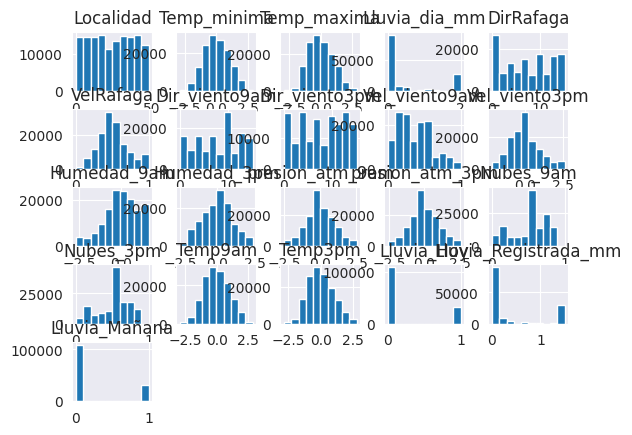

In [ ]:
df.hist()

In [ ]:
def mostrar_resultados(y_test, y_pred_arbol):
    conf_matrix = confusion_matrix(y_test, y_pred_arbol)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Verdadero Lluvia_Mañana')
    plt.xlabel('Predicted Lluvia_Mañana')
    plt.show()
    print (classification_report(y_test, y_pred_arbol))

##**Modelo Arbol de decision**

In [ ]:
X.head()

,Temp_minima,Temp_maxima,Vel_viento3pm,Humedad_3pm,Temp3pm,Nubes_9am
0,0.189490,-0.047787,0.649428,-1.432724,0.010709,0.888889
1,-0.748711,0.262380,0.413306,-1.287262,0.372332,0.710262
2,0.111307,0.346972,0.885551,-1.044825,0.213218,0.710262
3,-0.467251,0.671238,-1.121493,-1.723649,0.690560,0.710262
4,0.830595,1.277475,0.177183,-0.899363,1.153437,0.777778


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83     21897
           1       0.47      0.70      0.56      6261

    accuracy                           0.76     28158
   macro avg       0.69      0.74      0.70     28158
weighted avg       0.80      0.76      0.77     28158



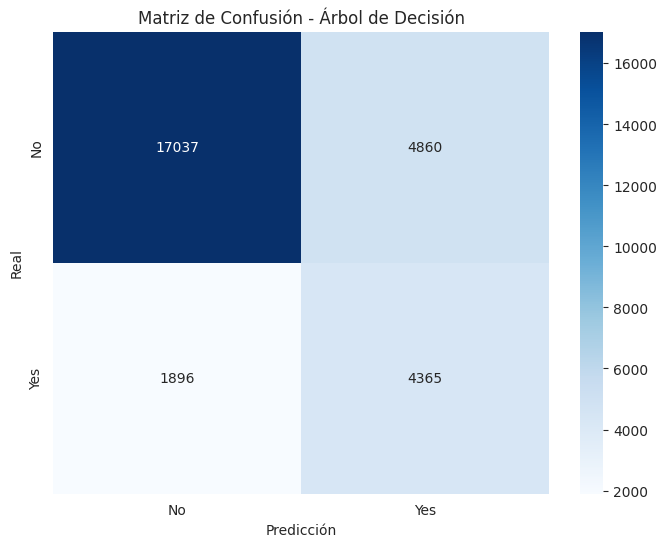

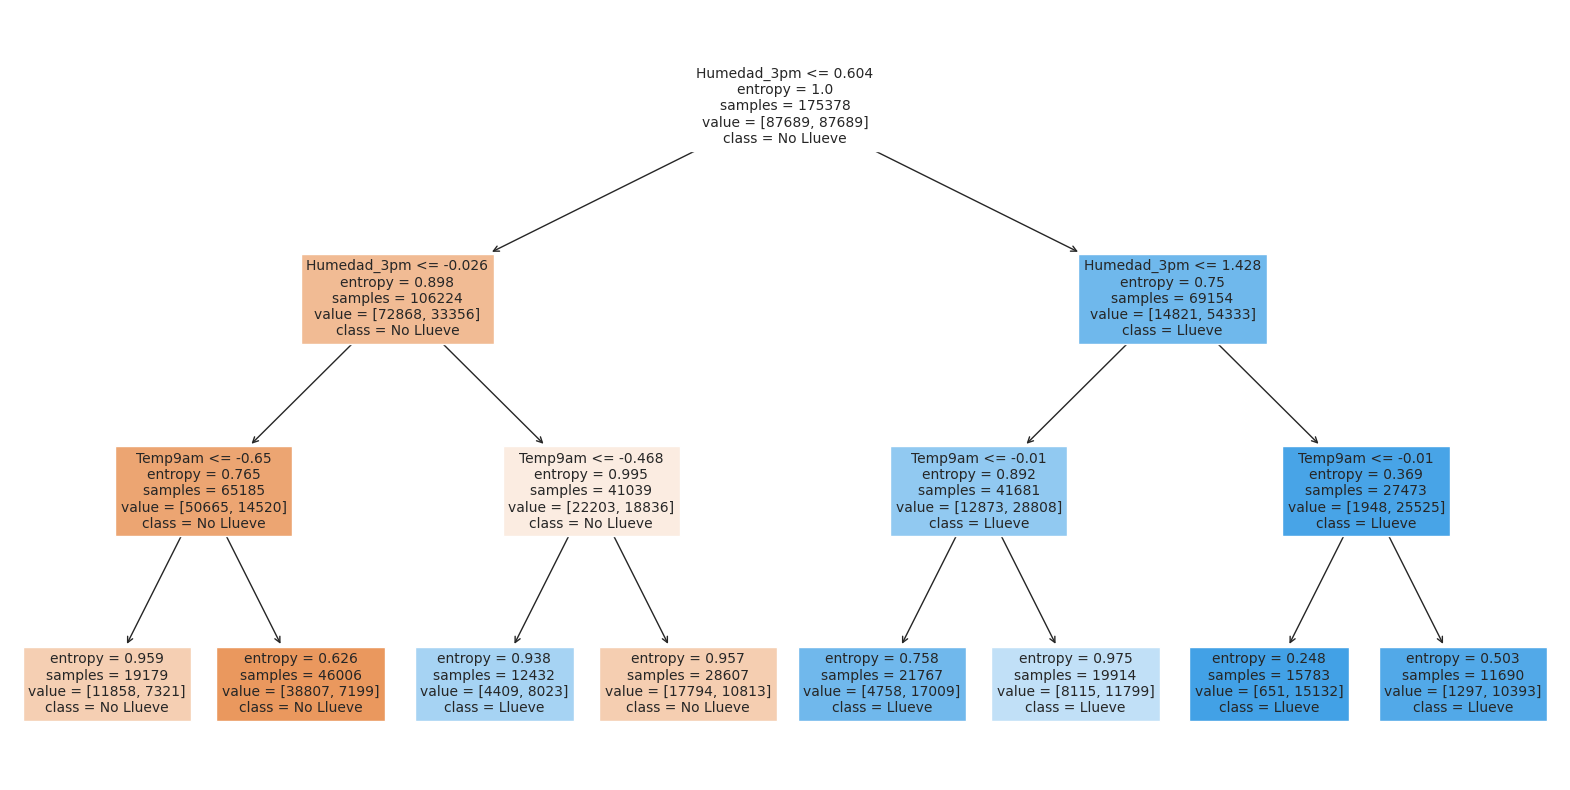

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame
# Asegúrate de cargar tus datos aquí
# df = pd.read_csv('path_to_your_data.csv')

# Selección de características y variable objetivo
#X = df[['Temp_minima', 'Temp_maxima', 'Vel_viento3pm','presion_atm_3pm','presion_atm_3pm','Temp3pm','Humedad_3pm', 'Temp9am', 'Nubes_9am']]

X = df.drop('Lluvia_Mañana', axis=1)
y = df['Lluvia_Mañana']

# Paso 2: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Manejo del desbalanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Paso 4: Entrenar el modelo
model_arbol = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model_arbol.fit(X_train_resampled, y_train_resampled)

# Paso 5: Evaluar el modelo
y_pred_arbol = model_arbol.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_arbol))

# Paso 6: Visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_arbol)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

# Paso 7: Visualizar el Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(model_arbol, filled=True, feature_names=['Temp_minima','presion_atm_3pm','Temp9am', 'Temp_maxima', 'Vel_viento3pm', 'Humedad_3pm', 'Temp3pm', 'Nubes_9am'], class_names=['No Llueve', 'Llueve'])
plt.show()


##EVALUACION DEL MODELO

**Métricas del Reporte de Clasificación**

Precisión de Clase 0 (No Llueve): Alta (0.90), lo que indica que el modelo es muy preciso al predecir la clase 0.
Precisión de Clase 1 (Llueve): Baja (0.47), indicando que el modelo no es tan preciso para predecir la clase 1.
Recall de Clase 0: Relativamente alto (0.78), lo que sugiere que el modelo encuentra bien los casos de la clase 0.
Recall de Clase 1: Moderado (0.70), pero aún puede mejorar. El modelo identifica bien algunos casos positivos de la clase 1, pero podría hacerlo mejor.
F1-Score de Clase 0: Bueno (0.83), equilibrando precisión y recall.
F1-Score de Clase 1: Más bajo (0.56), mostrando un equilibrio menor entre precisión y recall para la clase 1.

Conclusión
El modelo de Árbol de Decisión tiene un buen desempeño en la predicción de la clase 0 (No Llueve), pero podría mejorarse para la clase 1 (Llueve). La precisión general es buena (76%), pero la diferencia en el rendimiento entre las dos clases sugiere que puede haber un desbalance en los datos o que el modelo necesita ajustes para manejar mejor las predicciones para la clase positiva (Llueve).








Con un AUC de 0.80, tu modelo tiene una capacidad bastante buena para diferenciar entre las clases de Lluvia_Mañana. Sin embargo, siempre hay espacio para mejorar.


 **validación cruzada**

 Es una evaluación más robusta del rendimiento del modelo al probarlo en varios subconjuntos del conjunto de datos, en lugar de solo una división única entre entrenamiento y prueba. . En lugar de entrenar y probar el modelo en un único conjunto de datos de entrenamiento y prueba, se divide el conjunto de datos en múltiples partes (o pliegues) y se entrena el modelo en diferentes combinaciones de estos pliegos.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Crear el clasificador
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Realizar validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # cv=5 significa 5 pliegues

# Mostrar los resultados
print("Precisión por pliegue:", cv_scores)
print("Precisión promedio:", np.mean(cv_scores))
print("Desviación estándar de la precisión:", np.std(cv_scores))


Precisión por pliegue: [0.82768663 0.82278571 0.83069929 0.82718329 0.83290123]
Precisión promedio: 0.8282512307963584
Desviación estándar de la precisión: 0.0034335614021703


Precisión Promedio (82.83%): El modelo, en promedio, clasifica correctamente el 82.83% de los ejemplos en los diferentes pliegos de validación.

Desviación Estándar Baja (0.34%): La baja desviación estándar indica que el modelo es consistente en su rendimiento a través de diferentes subconjuntos de los datos, lo cual es un buen indicio de que el modelo generaliza bien y no está sobreajustado a un subconjunto específico de los datos .Indica que el modelo tiene un rendimiento consistente y no es sensible a cambios en los subconjuntos de datos de prueba.


###**Predicciones**

Este DataFrame nuevo  muestra las características de entrada para 2 casos y la predicción del modelo para cada uno. La columna Predicción indica que, bajo las condiciones especificadas, el modelo espera lluvia en todos los casos.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Supongamos que estos son los nuevos datos que quieres predecir
nuevos_datos = pd.DataFrame({
    'Temp_minima': [10, 15],
    'Vel_viento3pm': [5, 8],
    'presion_atm_3pm': [1010, 1020],
    'presion_atm_9am': [1005, 1015],
    'Temp3pm': [25, 30],
    'Humedad_3pm': [60, 65],
    'Humedad_9am': [55, 70],
    'Temp9am': [20, 25],
    'Nubes_9am': [20, 15]
})

# Asegúrate de usar el mismo escalador que usaste para el entrenamiento
scaler = StandardScaler()
# Aplica el escalador a los nuevos datos (deberás ajustar el escalador a tus datos de entrenamiento)
nuevos_datos_scaled = scaler.fit_transform(nuevos_datos)

# Realiza las predicciones
predicciones = model_arbol.predict(nuevos_datos_scaled)

print("Predicciones para los nuevos datos:")
print(predicciones)


Predicciones para los nuevos datos:
[0 1]


Predicciones [0 1]: Indica que para el primer conjunto de nuevos datos, el modelo predice que no lloverá (0), y para el segundo conjunto de nuevos datos, el modelo predice que sí lloverá (1).

##**Modelo Regresion Lineal**

 El modelo de regresión lineal sera sido entrenado con datos históricos para predecir la cantidad de lluvia registrada en base a las características proporcionadas, como VelRafaga, Vel_viento9am, Temp_minima, etc. Las predicciones indican la cantidad estimada de lluvia para cada nuevo conjunto de características.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Supongamos que `df_x` es tu DataFrame y ya está cargado
# Seleccionar características y variable objetivo
X = df_x.drop('Lluvia_Registrada_mm', axis=1)
y = df_x['Lluvia_Registrada_mm']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)


###**3. Evaluar el Modelo**


Evalúa el desempeño del modelo utilizando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²)

In [ ]:
# Evaluar el modelo

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)


Error Cuadrático Medio (MSE): 0.23535078659513298
Coeficiente de Determinación (R²): 0.3697751565160661


(cercano a 0mejor )Error Cuadrático Medio (MSE): 0.23535078659513298:

 Mide el promedio de los cuadrados de los errores (diferencias entre las predicciones y los valores reales).El resultdo indica que, en promedio, las predicciones del modelo tienen un error cuadrático medio de 0.235 en la estimación de la lluvia registrada. Cuanto menor sea el MSE, mejor es la precisión del modelo.  Desviacion del

# Coeficiente de Determinación (R²): 0.370  

 (mejor cercano a 1)Mide el rendimiento del modelo, la proporción de la variabilidad en la variable dependiente (cantidad de lluvia) que es explicada por el modelo las variables independientes.

 El valor de 0.370 significa que el modelo explica aproximadamente el 37.0% de la variabilidad en la cantidad de lluvia registrada MM. Esto sugiere que hay un 63.0% de la variabilidad que el modelo no explica.

**Grafico de dispersion**


Se ve que tan desviados estan mis x= y_test,  valores de y= valores que se predijeron.

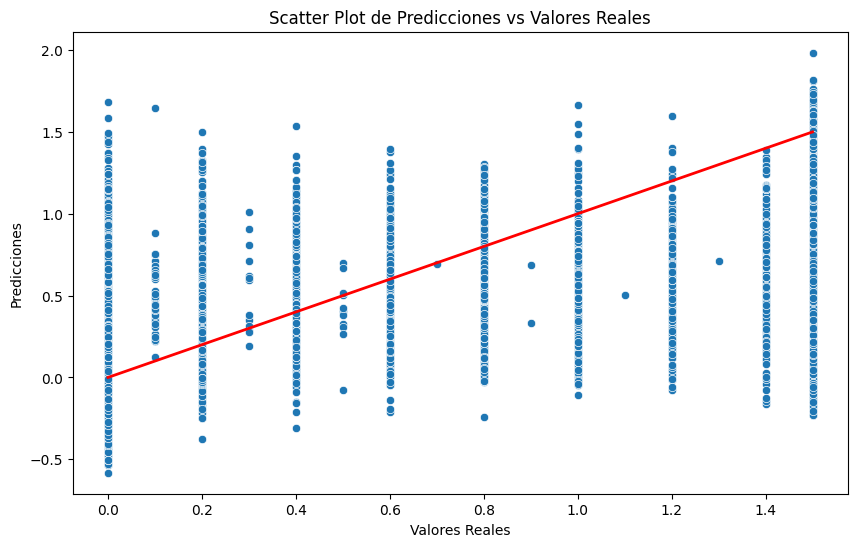

In [ ]:

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="Red", lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Scatter Plot de Predicciones vs Valores Reales")
plt.show()

**Predicciones**

In [ ]:
df_x.columns

Index(['VelRafaga', 'Vel_viento9am', 'Localidad', 'Temp_minima', 'Temp_maxima',
       'Lluvia_dia_mm', 'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm',
       'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm',
       'Temp9am', 'Temp3pm', 'Lluvia_Registrada_mm'],
      dtype='object')

In [ ]:
df_nuevos = pd.DataFrame({
    'Temp_minima': [12, 8],
    'Temp_maxima': [22, 15],
    'Vel_viento9am': [4, 3],
    'Vel_viento3pm': [6, 5],
    'Humedad_9am': [80, 85],
    'Humedad_3pm': [60, 70],
    'presion_atm_9am': [16, 15],
    'presion_atm_3pm': [15, 14],
    'Nubes_9am': [5, 7],
    'Nubes_3pm': [3, 4],
    'Temp9am': [14, 10],
    'Temp3pm': [20, 16],
    'VelRafaga': [30, 60],
    'Localidad': [1, 3],
    'Lluvia_dia_mm': [0.6, 0.0]})

# Preparar el escala
# Realizar predicciones
predicciones = model.predict(df_nuevos)

# Mostrar predicciones
print("Predicciones para los nuevos datos:", predicciones)


Predicciones para los nuevos datos: [10.29343059 14.65655203]


Las predicciones [10.29343059 14.65655203] generadas por tu modelo de regresión lineal indican las estimaciones de la variable objetivo (Lluvia_Registrada_mm) para los nuevos datos que has proporcionado. En este caso, la variable objetivo representa la cantidad de lluvia registrada en milímetros.

Predicción para el primer conjunto de datos nuevos: 10.29343059 mm

Esto significa que la cantidad estimada de lluvia registrada para el primer conjunto de características es aproximadamente 10.29 mm.

Predicción para el segundo conjunto de datos nuevos: 14.65655203 mm

Esto significa que la cantidad estimada de lluvia registrada para el segundo conjunto de características es aproximadamente 14.66 mm.

##**Modelo Naives**

El modelo Naive Bayes hace predicciones basándose en la probabilidad de que una muestra pertenezca a cada clase.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que `df` es tu DataFrame y ya está cargado
# Seleccionar características y variable objetivo

X = df.drop('Lluvia_Mañana', axis=1)
y = df['Lluvia_Mañana']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE solo a los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Estandarizar los datos
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Crear el clasificador Naive Bayes
model_naive_bayes = GaussianNB()

# Entrenar el modelo
model_naive_bayes.fit(X_train_res, y_train_res)




GaussianNB()

##**Fase 5 EVALUACION**  
Naives

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.72      0.80     21897
           1       0.44      0.77      0.56      6261

    accuracy                           0.73     28158
   macro avg       0.68      0.74      0.68     28158
weighted avg       0.81      0.73      0.75     28158

Precisión por pliegue: [0.81248668 0.77764756 0.80395639 0.82530099 0.83197784]
Precisión promedio: 0.8102738918617574
Desviación estándar de la precisión: 0.019006103380412222


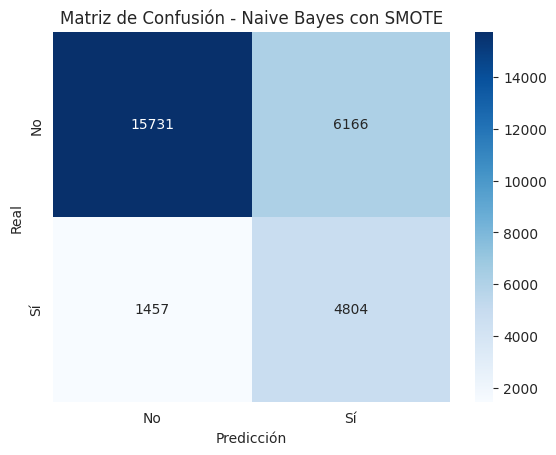

In [ ]:

# Evaluar el modelo
y_pred = model_naive_bayes.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Validación cruzada
cv_scores = cross_val_score(model_naive_bayes, scaler.fit_transform(X), y, cv=5, scoring='accuracy')
print("Precisión por pliegue:", cv_scores)
print("Precisión promedio:", np.mean(cv_scores))
print("Desviación estándar de la precisión:", np.std(cv_scores))

# Mostrar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Naive Bayes con SMOTE')
plt.show()


**Precisión (precision):**

Clase 0 (No Lluvia): 0.92
Clase 1 (Lluvia): 0.44
La precisión mide la proporción de verdaderos positivos sobre el total de positivos predichos. Para la clase 0, la precisión es alta, indicando que la mayoría de las predicciones de "No Lluvia" son correctas. Para la clase 1, es más baja, lo que indica que hay una cantidad significativa de falsos positivos (se predice lluvia cuando no la hay).

**Recall (recall):**

Clase 0 (No Lluvia): 0.72
Clase 1 (Lluvia): 0.77
El recall mide la proporción de verdaderos positivos sobre el total de positivos reales. Para la clase 0, el recall es moderado, indicando que el modelo pierde algunas instancias de "No Lluvia". Para la clase 1, el recall es más alto, indicando que el modelo captura la mayoría de las instancias de "Lluvia".

**F1-score:**

Clase 0 (No Lluvia): 0.80
Clase 1 (Lluvia): 0.56
El F1-score es la media armónica de la precisión y el recall. Indica el equilibrio entre ambos. Para la clase 0, el F1-score es decente, mientras que para la clase 1 es más bajo, reflejando el compromiso entre precisión y recall.

**Accuracy (exactitud)**: 0.73

La exactitud es la proporción de predicciones correctas sobre el total de predicciones. Un 68% de las predicciones totales son correctas.


2.**Validación Cruzada:**


Precisión por pliegue: [0.81248668 0.77764756 0.80395639 0.82530099 0.83197784]
Precisión promedio: 0.8102738918617574
Desviación estándar de la precisión: 0.019006103380412222


La validación cruzada es una técnica que se utiliza para evaluar la capacidad de generalización de un modelo. En este caso, se ha utilizado una validación cruzada con 5 pliegues (5-fold cross-validation), dividiendo los datos en 5 subconjuntos, entrenando el modelo en 4 de ellos y evaluándolo en el subconjunto restante. Este proceso se repite 5 veces, con cada subconjunto utilizado una vez como conjunto de prueba.

Precisión por pliegue: [0.81248668 0.77764756 0.80395639 0.82530099 0.83197784]

La precisión varía entre los pliegues 5 pliegues, lo que muestra cómo el modelo se desempeña con diferentes subconjuntos de datos.

Precisión promedio: 0.8102738918617574

Promedio de las precisiones de los diferentes pliegues. Indica que, en general, el modelo tiene un rendimiento bastante consistente.

Desviación estándar de la precisión: 0.019006103380412222

Medida de la dispersión de las precisiones a través de los pliegues. Una baja desviación estándar indica que el modelo es bastante estable,  con poca variabilidad en su rendimiento



Explicación del Modelo Naive Bayes
El algoritmo Naive Bayes es un clasificador probabilístico basado en el Teorema de Bayes. Asume que las características son independientes entre sí (asunción de independencia), lo que rara vez es cierto en la práctica, pero aún así, el algoritmo puede funcionar sorprendentemente bien en muchos casos.

Pasos del Algoritmo:

Cálculo de Probabilidades: Calcula las probabilidades de cada clase dado cada característica.
Aplicación del Teorema de Bayes: Combina estas probabilidades para determinar la probabilidad posterior de cada clase.
Asignación de Clase: Asigna la clase con la probabilidad posterior más alta a cada instancia.
Uso de SMOTE:

SMOTE (Synthetic Minority Over-sampling Technique): Es una técnica utilizada para balancear conjuntos de datos desbalanceados. Genera nuevas instancias sintéticas para la clase minoritaria en el conjunto de entrenamiento, ayudando al modelo a aprender mejor las características de ambas clases y mejorar su rendimiento en datos desbalanceados.

Resumen
El modelo Naive Bayes, al ser combinado con SMOTE, mejora su capacidad para predecir la clase minoritaria (lluvia) a costa de una precisión algo menor.

La precisión promedio de la validación cruzada muestra que el modelo es bastante consistente.








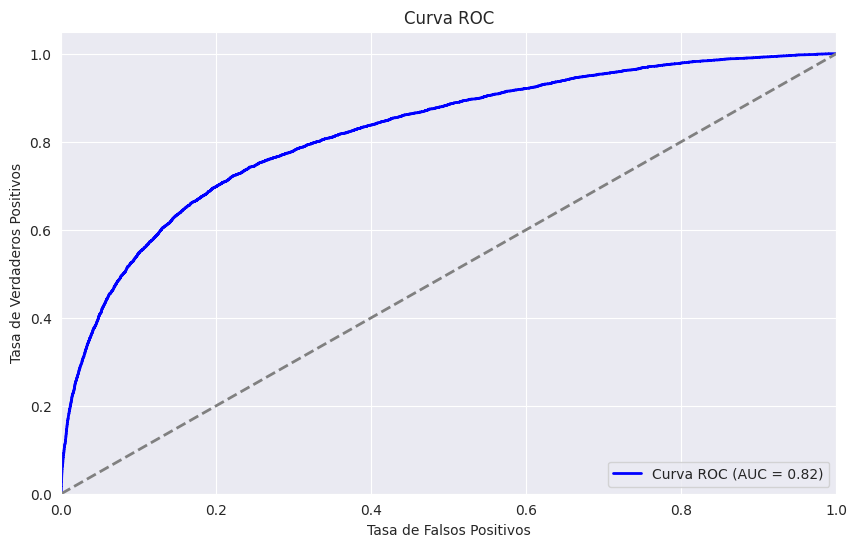

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas para el ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = model_naive_bayes.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)

# Calcular el AUC
roc_auc = roc_auc_score(y_test_bin, y_pred_prob)

# Visualizar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Un AUC de 0.82 indica que el modelo tiene una buena capacidad para distinguir entre las clases (lluvia y no lluvia).
En promedio, hay un 82% de probabilidad de que el modelo clasifique correctamente un positivo real como más probable que un negativo real.

**PREDICCIONES**

In [ ]:
# Supongamos que estos son los nuevos datos que quieres predecir
nuevos_datos = pd.DataFrame({
    'Temp_minima': [10, 15],
    'Vel_viento3pm': [5, 8],
    'presion_atm_3pm': [1010, 1020],
    'presion_atm_9am': [1005, 1015],
    'Temp3pm': [25, 30],
    'Humedad_3pm': [60, 65],
    'Humedad_9am': [55, 70],
    'Temp9am': [20, 25],
    'Nubes_9am': [20, 15]
})

# Asegúrate de usar el mismo escalador que usaste para el entrenamiento
scaler = StandardScaler()
# Aplica el escalador a los nuevos datos (deberás ajustar el escalador a tus datos de entrenamiento)
nuevos_datos_scaled = scaler.fit_transform(nuevos_datos)

# Realiza las predicciones
predicciones = model_naive_bayes.predict(nuevos_datos_scaled)

print("Predicciones para los nuevos datos:")
print(predicciones)


Predicciones para los nuevos datos:
[0 1]


##**Fase 6 Despliegue**

Guardar el modelo

In [ ]:
import joblib

joblib.dump(model_naive_bayes, 'modelo_naive_bayes.pkl')


Despliegue en Power BI

Exportar Predicciones: Guarda las predicciones en un archivo CSV

In [ ]:
predictions_df = pd.DataFrame({
    'Temp_minima': X_test[:, 0],
    'Vel_viento3pm': X_test[:, 1],
    'presion_atm_3pm': X_test[:, 2],
    'presion_atm_9am': X_test[:, 3],
    'Temp3pm': X_test[:, 4],
    'Humedad_3pm': X_test[:, 5],
    'Humedad_9am': X_test[:, 6],
    'Temp9am': X_test[:, 7],
    'Nubes_9am': X_test[:, 8],
    'Predicción': y_pred
})
predictions_df.to_csv('predicciones_naive_bayes.csv', index=False)


##**Modelo K-means**

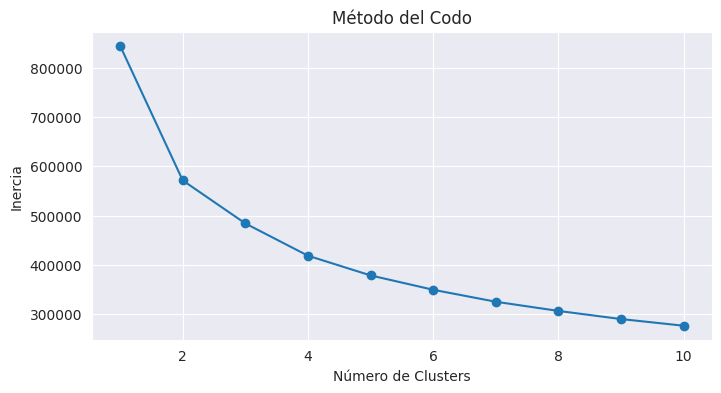

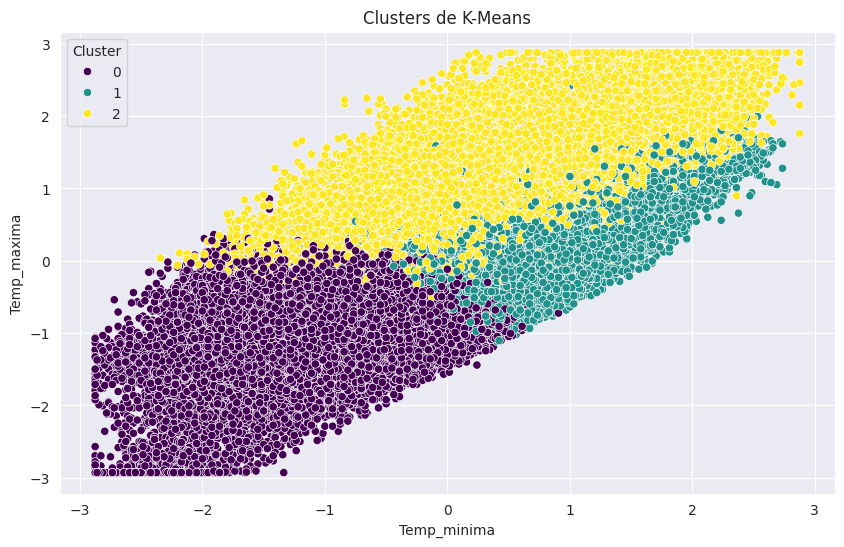

   Temp_minima  Temp_maxima  Vel_viento3pm  Humedad_3pm   Temp3pm  Nubes_9am
0    -0.825292    -0.869972      -0.204215     0.289942 -0.850756   0.536809
1     0.760166     0.279015       0.374572     0.515984  0.226827   0.644868
2     0.484226     1.084773      -0.085226    -1.031164  1.111421   0.315873


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# Seleccionar características para el clustering
features = ['Temp_minima', 'Temp_maxima', 'Vel_viento3pm', 'Humedad_3pm', 'Temp3pm', 'Nubes_9am']
X = df[features]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el método del codo para encontrar el número óptimo de clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Aplicar K-Means con el número óptimo de clusters (ejemplo: 3 clusters)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clusters
clusters = kmeans.labels_

# Agregar las etiquetas de los clusters al DataFrame original
df['Cluster'] = clusters

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temp_minima', y='Temp_maxima', hue='Cluster', palette='viridis')
plt.title('Clusters de K-Means')
plt.show()

# Ver las coordenadas de los centroides en la escala original
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print(cluster_centers_df)


**Centroides**
Los centroides de cada cluster después de aplicar el algoritmo K-Means. Cada fila corresponde a un cluster y cada columna muestra el valor medio de una variable climática específica para ese cluster. Aquí tienes un análisis básico basado en los centroides

Evaluacion

In [ ]:
# Supongamos que df es tu DataFrame original y kmeans es el modelo K-Means entrenado
# Definir los nuevos datos (deben tener las mismas características que los datos originales)
nuevos_datos = pd.DataFrame({
    'Temp_minima': [0.1, -0.2],
    'Temp_maxima': [0.5, -0.3],
    'Vel_viento3pm': [0.3, 0.7],
    'Humedad_3pm': [0.2, 0.4],
    'Temp3pm': [0.6, -0.1],
    'Nubes_9am': [0.4, 0.5]
})

# Estandarizar los datos nuevos usando el mismo scaler que para los datos de entrenamiento
scaler = StandardScaler()
X_scaled_nuevos_datos = scaler.fit_transform(nuevos_datos)

# Aplicar el modelo K-Means para predecir el cluster de los nuevos datos
clusters_nuevos_datos = kmeans.predict(X_scaled_nuevos_datos)

# Agregar las predicciones al DataFrame de nuevos datos
nuevos_datos['Cluster'] = clusters_nuevos_datos

# Mostrar los datos nuevos con sus respectivos clusters
nuevos_datos


,Temp_minima,Temp_maxima,Vel_viento3pm,Humedad_3pm,Temp3pm,Nubes_9am,Cluster
0,0.1,0.5,0.3,0.2,0.6,0.4,2
1,-0.2,-0.3,0.7,0.4,-0.1,0.5,0


Fila 0: La observación con valores 0.1 para Temp_minima, 0.5 para Temp_maxima, 0.3 para Vel_viento3pm, 0.2 para Humedad_3pm, 0.6 para Temp3pm, y 0.4 para Nubes_9am ha sido asignada al Cluster 2.

Fila 1: La observación con valores -0.2 para Temp_minima, -0.3 para Temp_maxima, 0.7 para Vel_viento3pm, 0.4 para Humedad_3pm, -0.1 para Temp3pm, y 0.5 para Nubes_9am ha sido asignada al Cluster 0.

#Fase 6 Despliegue

. Guardar los Modelos y Resultados
Primero, guarda los modelos entrenados y cualquier resultado relevante en archivos que puedas descargar. Aquí te muestro cómo hacerlo para cada tipo de modelo que has mencionado.

Guardar Modelos
Puedes usar la biblioteca joblib para guardar modelos en archivos. Aquí te muestro cómo guardar cada uno de los modelos:

In [ ]:
# Ejemplo para K-Means
df.to_csv('kmeans_results.csv', index=False)

# Ejemplo para Árbol de Decisión
y_pred_arbol_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_arbol})
y_pred_arbol_df.to_csv('decision_tree_results.csv', index=False)

# Ejemplo para Regresión Lineal
y_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
y_pred_df.to_csv('linear_regression_results.csv', index=False)

# Ejemplo para Naive Bayes
y_pred_nb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
y_pred_nb_df.to_csv('naive_bayes_results.csv', index=False)


In [ ]:
import joblib

# Guardar el modelo KMeans
joblib.dump(kmeans, '/content/kmeans_model.pkl')

# Guardar el modelo de Árbol de Decisión
joblib.dump(model_arbol, '/content/arbol_decision_model.pkl')

# Guardar el modelo de Regresión Lineal
joblib.dump(model, '/content/regresion_lineal_model.pkl')

# Guardar el modelo de Naive Bayes
joblib.dump(model_naive_bayes, '/content/naive_bayes_model.pkl')


['/content/naive_bayes_model.pkl']

Guardar Resultados
Guarda los resultados de tus predicciones en archivos CSV si es necesario:

In [ ]:
# Guardar resultados de predicciones
df_predicciones = pd.DataFrame({
    'Predicciones': y_pred
})
df_predicciones.to_csv('/content/predicciones.csv', index=False)


Descargar Archivos a tu Máquina Local
Luego de guardar los modelos y resultados en el entorno de Colab, puedes descargarlos a tu máquina local usando files.download:

In [ ]:
from google.colab import files

# Descargar los modelos
files.download('/content/kmeans_model.pkl')
files.download('/content/arbol_decision_model.pkl')
files.download('/content/regresion_lineal_model.pkl')
files.download('/content/naive_bayes_model.pkl')

# Descargar los resultados de predicciones
files.download('/content/predicciones.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reintegrar las variables categóricas originales al DataFrame limpio
df = pd.concat([df, df_obj], axis=1)

In [ ]:
# Suponiendo que tu DataFrame se llama df
df.to_csv('/content/drive/My Drive/df_modelos.csv', index=False)
